In [20]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy

In [21]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=150, dpi_save= 500, fontsize=10, frameon=True, figsize=(3, 3), transparent=False, format="pdf")


-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bioservices         1.7.11
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstrings     NA
google              NA
gridfs              NA
gseapy              0.10.4
h5py                2.10.0
idna                2.10
igraph     

In [22]:
Mock_Heart_D4PI_sc = sc.read_10x_h5('./../../../scData/Heart_Mock_D4PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D4PI_sc = sc.read_10x_h5('./../../../scData/Heart_T1L_D4PI/outs/filtered_feature_bc_matrix.h5')
Mock_Heart_D7PI_sc = sc.read_10x_h5('./../../../scData/Heart_Mock_D7PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_sc = sc.read_10x_h5('./../../../scData/Heart_T1L_D7PI/outs/filtered_feature_bc_matrix.h5')
Mock_Heart_D10PI_sc = sc.read_10x_h5('./../../../scData/Heart_Mock_D10PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_sc = sc.read_10x_h5('./../../../scData/Heart_T1L_D10PI/outs/filtered_feature_bc_matrix.h5')

Mock_Heart_D4PI_sc.var_names_make_unique()
T1L_WT_Heart_D4PI_sc.var_names_make_unique()
Mock_Heart_D7PI_sc.var_names_make_unique()
T1L_WT_Heart_D7PI_sc.var_names_make_unique()
Mock_Heart_D10PI_sc.var_names_make_unique()
T1L_WT_Heart_D10PI_sc.var_names_make_unique()

reading ./../../../scData/Heart_Mock_D4PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../../../scData/Heart_T1L_D4PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../../../scData/Heart_Mock_D7PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../../../scData/Heart_T1L_D7PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../../../scData/Heart_Mock_D10PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../../../scData/Heart_T1L_D10PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [9]:
samples = ["Heart_Mock_D4PI", "Heart_T1L-WT_D4PI", "Heart_Mock_D7PI", "Heart_T1L-WT_D7PI", "Heart_Mock_D10PI", "Heart_T1L-WT_D10PI"]


In [23]:
# Merge all smaple in one AnnData object
heart_infection_sc = Mock_Heart_D4PI_sc.concatenate(T1L_WT_Heart_D4PI_sc, Mock_Heart_D7PI_sc, T1L_WT_Heart_D7PI_sc,
                                                             Mock_Heart_D10PI_sc, T1L_WT_Heart_D10PI_sc,
                                                    batch_key= "sample", batch_categories=samples,
                                                    index_unique="-")

In [24]:
heart_infection_sc.obs_names_make_unique()
heart_infection_sc.var_names_make_unique()
print(heart_infection_sc.shape)

(37691, 54848)


In [25]:
# This sections removes viral trasncript counts from the gene expression matrix and saves it in the meta data.

reoviral_genes = [name for name in heart_infection_sc.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(heart_infection_sc.var_names, reoviral_genes)
heart_infection_sc = heart_infection_sc[:, ~reoviral_genes_indicator]
heart_infection_sc.var_names = [name.split("_")[1] for name in heart_infection_sc.var_names]
heart_infection_sc.obs = heart_infection_sc.obs.join(viral_expression.astype(int))
print(heart_infection_sc.shape)

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(37691, 54838)


In [26]:
# Printing meta data variables 
heart_infection_sc.obs.columns

Index(['sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1',
       'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3'],
      dtype='object')

In [27]:
# Filtering step to remove empty rows and columns 

sc.pp.filter_cells(heart_infection_sc, min_counts=1)
sc.pp.filter_genes(heart_infection_sc, min_cells=1)

filtered out 1 cells that have less than 1 counts
filtered out 21699 genes that are detected in less than 1 cells


In [28]:
# This section calculates the mitrochondrial precent transcripts in every cells

heart_infection_sc.var['mt'] = heart_infection_sc.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(heart_infection_sc, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [29]:
# Calculation the total viral counts and percent viral counts and saving meta data

heart_infection_sc.obs['total_viral'] = viral_expression.sum(axis=1).astype(int)
heart_infection_sc.obs['pct_viral'] = ((heart_infection_sc.obs['total_viral']) / (heart_infection_sc.obs['total_viral'] + heart_infection_sc.obs['total_counts']))

In [30]:
# Spliting sample names into stage, state, and condition

heart_infection_sc.obs["stage"] = [x.split("_")[2] for x in heart_infection_sc.obs["sample"]]
heart_infection_sc.obs["state"] = [x.split("_")[1] for x in heart_infection_sc.obs["sample"]]
heart_infection_sc.obs["stage"] = heart_infection_sc.obs["stage"].astype("category")
heart_infection_sc.obs["state"] = heart_infection_sc.obs["state"].astype("category")
heart_infection_sc.obs["stage"].cat.reorder_categories(new_categories=["D4PI", "D7PI", "D10PI"], inplace = True)
heart_infection_sc.obs["state"].cat.reorder_categories(new_categories=["Mock", "T1L-WT"], inplace = True)
heart_infection_sc.obs["condition"] = [heart_infection_sc.obs["state"][i] + "_" + heart_infection_sc.obs["stage"][i] for i in range(heart_infection_sc.shape[0])]
heart_infection_sc.obs["condition"] = heart_infection_sc.obs["condition"].astype("category")
heart_infection_sc.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "Mock_D7PI", "Mock_D10PI", "T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"], inplace = True)

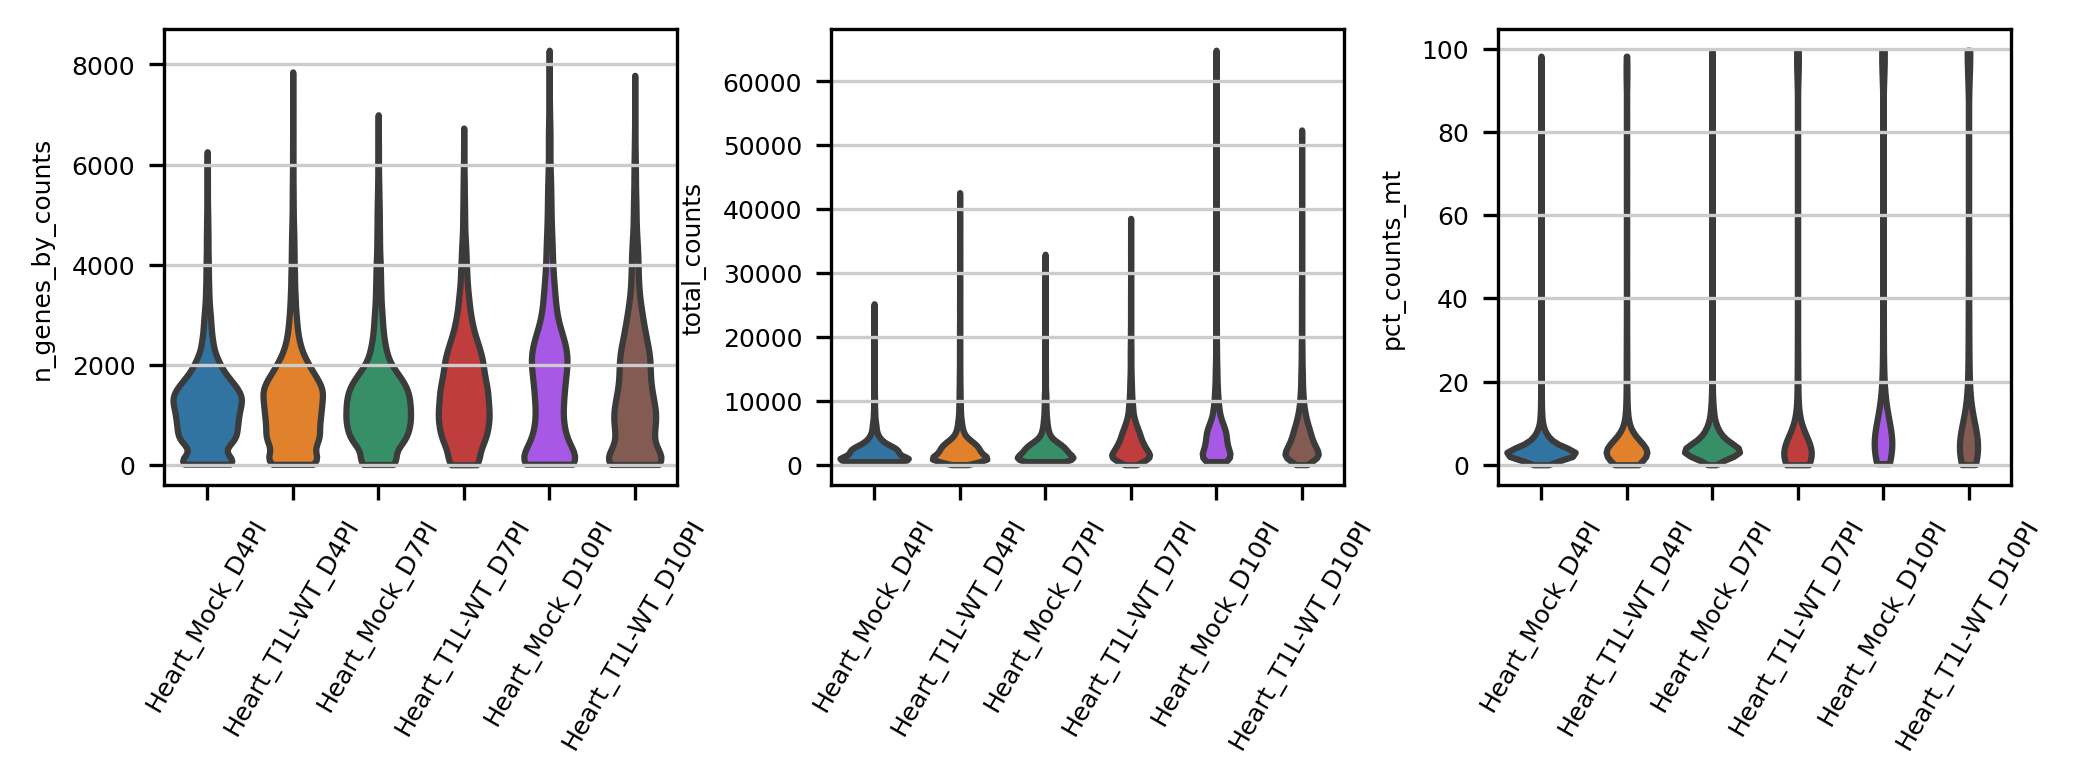

In [36]:
# Ploting data QC for heart scRNAseq

sc.settings.set_figure_params(dpi=150, dpi_save= 500, fontsize=6, frameon=True, figsize=(3, 2), transparent=False, format="pdf")
sc.pl.violin(heart_infection_sc,  ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             stripplot=False, multi_panel=False, scale="area", groupby = "sample", rotation=60)

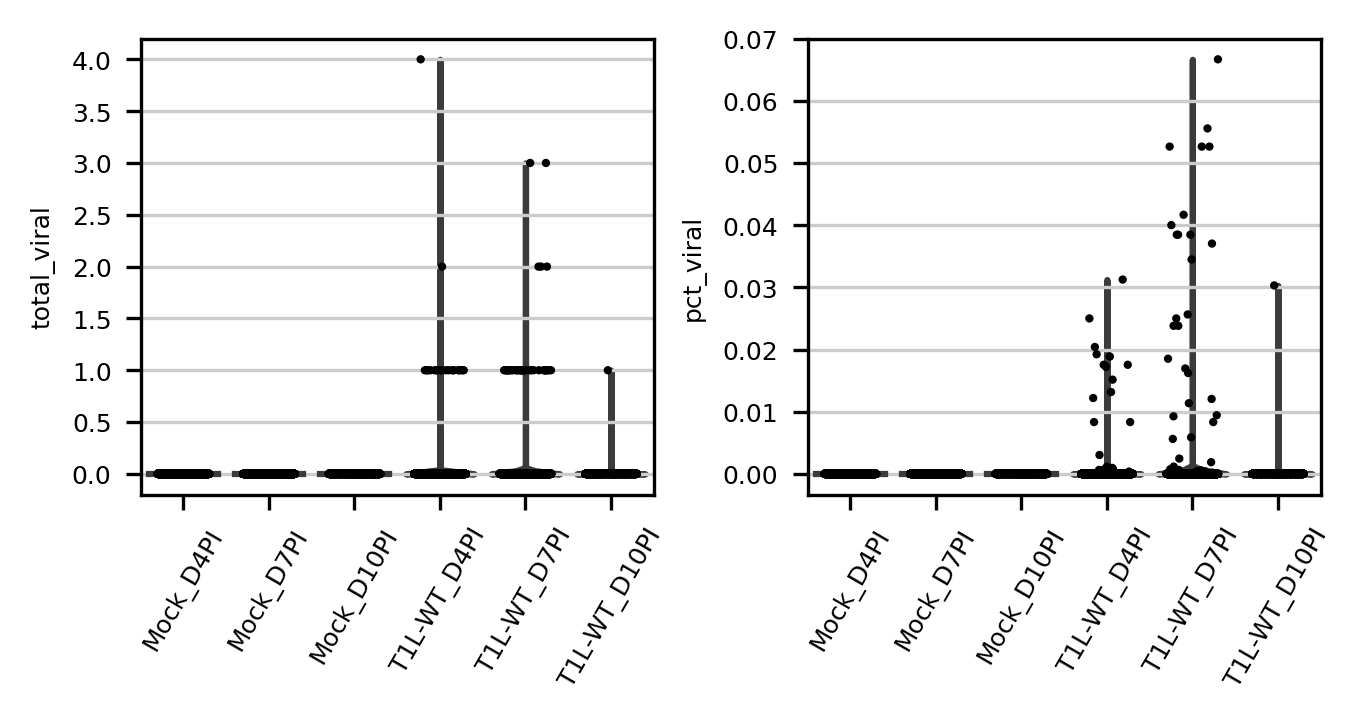

In [39]:
# Ploting total viral transcripts and percent of viral transcripts across samples

sc.settings.set_figure_params(dpi=150, dpi_save= 500, fontsize=6, frameon=True, figsize=(3, 2), transparent=False, format="pdf")
sc.pl.violin(heart_infection_sc, ["total_viral", "pct_viral"],
             jitter=0.3, size = 2.0, multi_panel=True, stripplot=True, groupby = "condition", rotation= 60)

In [41]:
print("Total number of viral transcripts captured: ", np.sum(heart_infection_sc.obs["total_viral"]))

Total number of viral transcripts captured:  74


In [42]:
# Filtering cells with > 25% mitochronrial UMI, < 200 genes detected.
# Filtering genes expressed in less than 10 cells

heart_infection_sc = heart_infection_sc[heart_infection_sc.obs.pct_counts_mt < 25, :]
sc.pp.filter_cells(heart_infection_sc, min_genes=200)
sc.pp.filter_genes(heart_infection_sc, min_cells=10)

/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


filtered out 3527 cells that have less than 200 genes expressed


Trying to set attribute `.obs` of view, copying.


filtered out 10382 genes that are detected in less than 10 cells


In [43]:
# Cells across different samples
heart_infection_sc.obs["condition"].value_counts()

Mock_D7PI       7096
Mock_D4PI       6596
T1L-WT_D4PI     5970
T1L-WT_D7PI     5086
Mock_D10PI      3483
T1L-WT_D10PI    3453
Name: condition, dtype: int64

In [45]:
# heart_infection_sc.write_h5ad("./../../../pyobjs_github/heart_infection_sc_no_viral_genes_raw_counts.h5ad")

In [46]:
# Normalizing
sc.pp.normalize_total(heart_infection_sc, target_sum=1e4)
sc.pp.log1p(heart_infection_sc)

normalizing counts per cell
    finished (0:00:00)


In [47]:
sc.pp.highly_variable_genes(heart_infection_sc, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:12)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


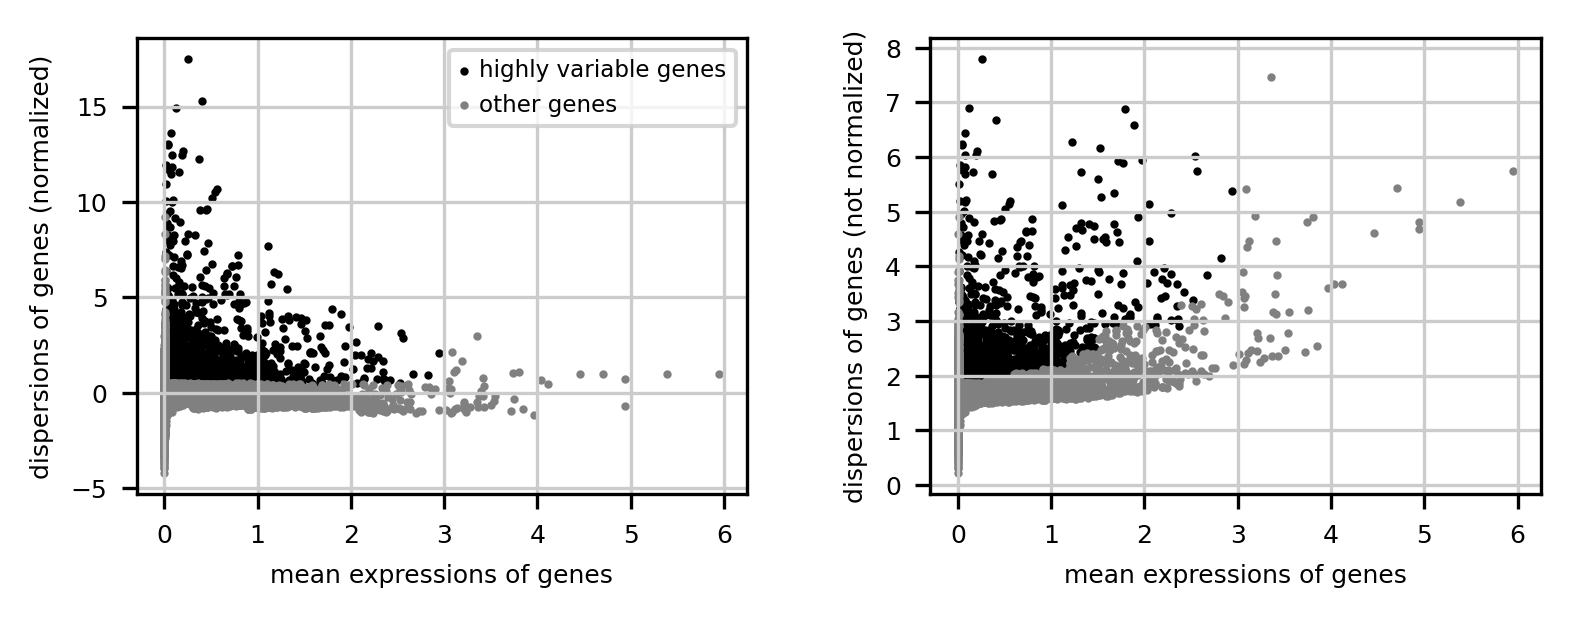

In [48]:
sc.pl.highly_variable_genes(heart_infection_sc, )

In [51]:
s_genes = list(pd.read_csv("./../../../s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../../../g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [52]:
sc.tl.score_genes_cell_cycle(heart_infection_sc, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    finished: added
    'S_score', score of gene set (adata.obs).
    503 total control genes are used. (0:00:01)
computing score 'G2M_score'


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    543 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


In [53]:
heart_infection_sc.raw = heart_infection_sc
heart_infection_sc = heart_infection_sc[:, heart_infection_sc.var.highly_variable]

/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [54]:
sc.pp.regress_out(heart_infection_sc, keys=['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)

regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


    finished (0:00:15)


In [55]:
# Scaling the data before running PCA on hihgly varibale genes

sc.pp.scale(heart_infection_sc, max_value=10)

In [56]:
# Running PCA on data 

sc.tl.pca(heart_infection_sc)

computing PCA
    on highly variable genes


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    with n_comps=50
    finished (0:00:07)


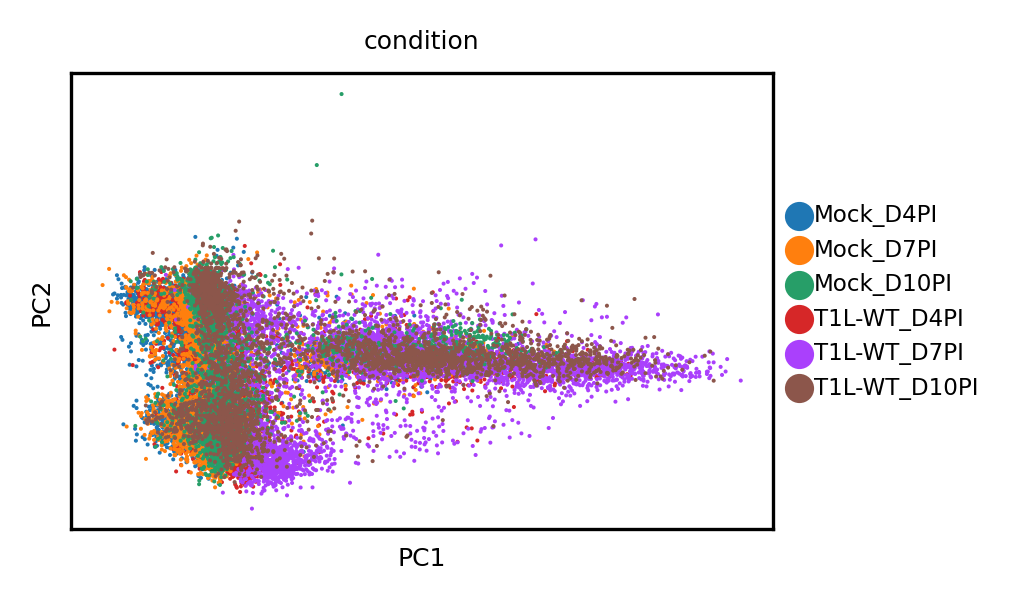

In [57]:
sc.pl.pca(heart_infection_sc, color = ["condition"])

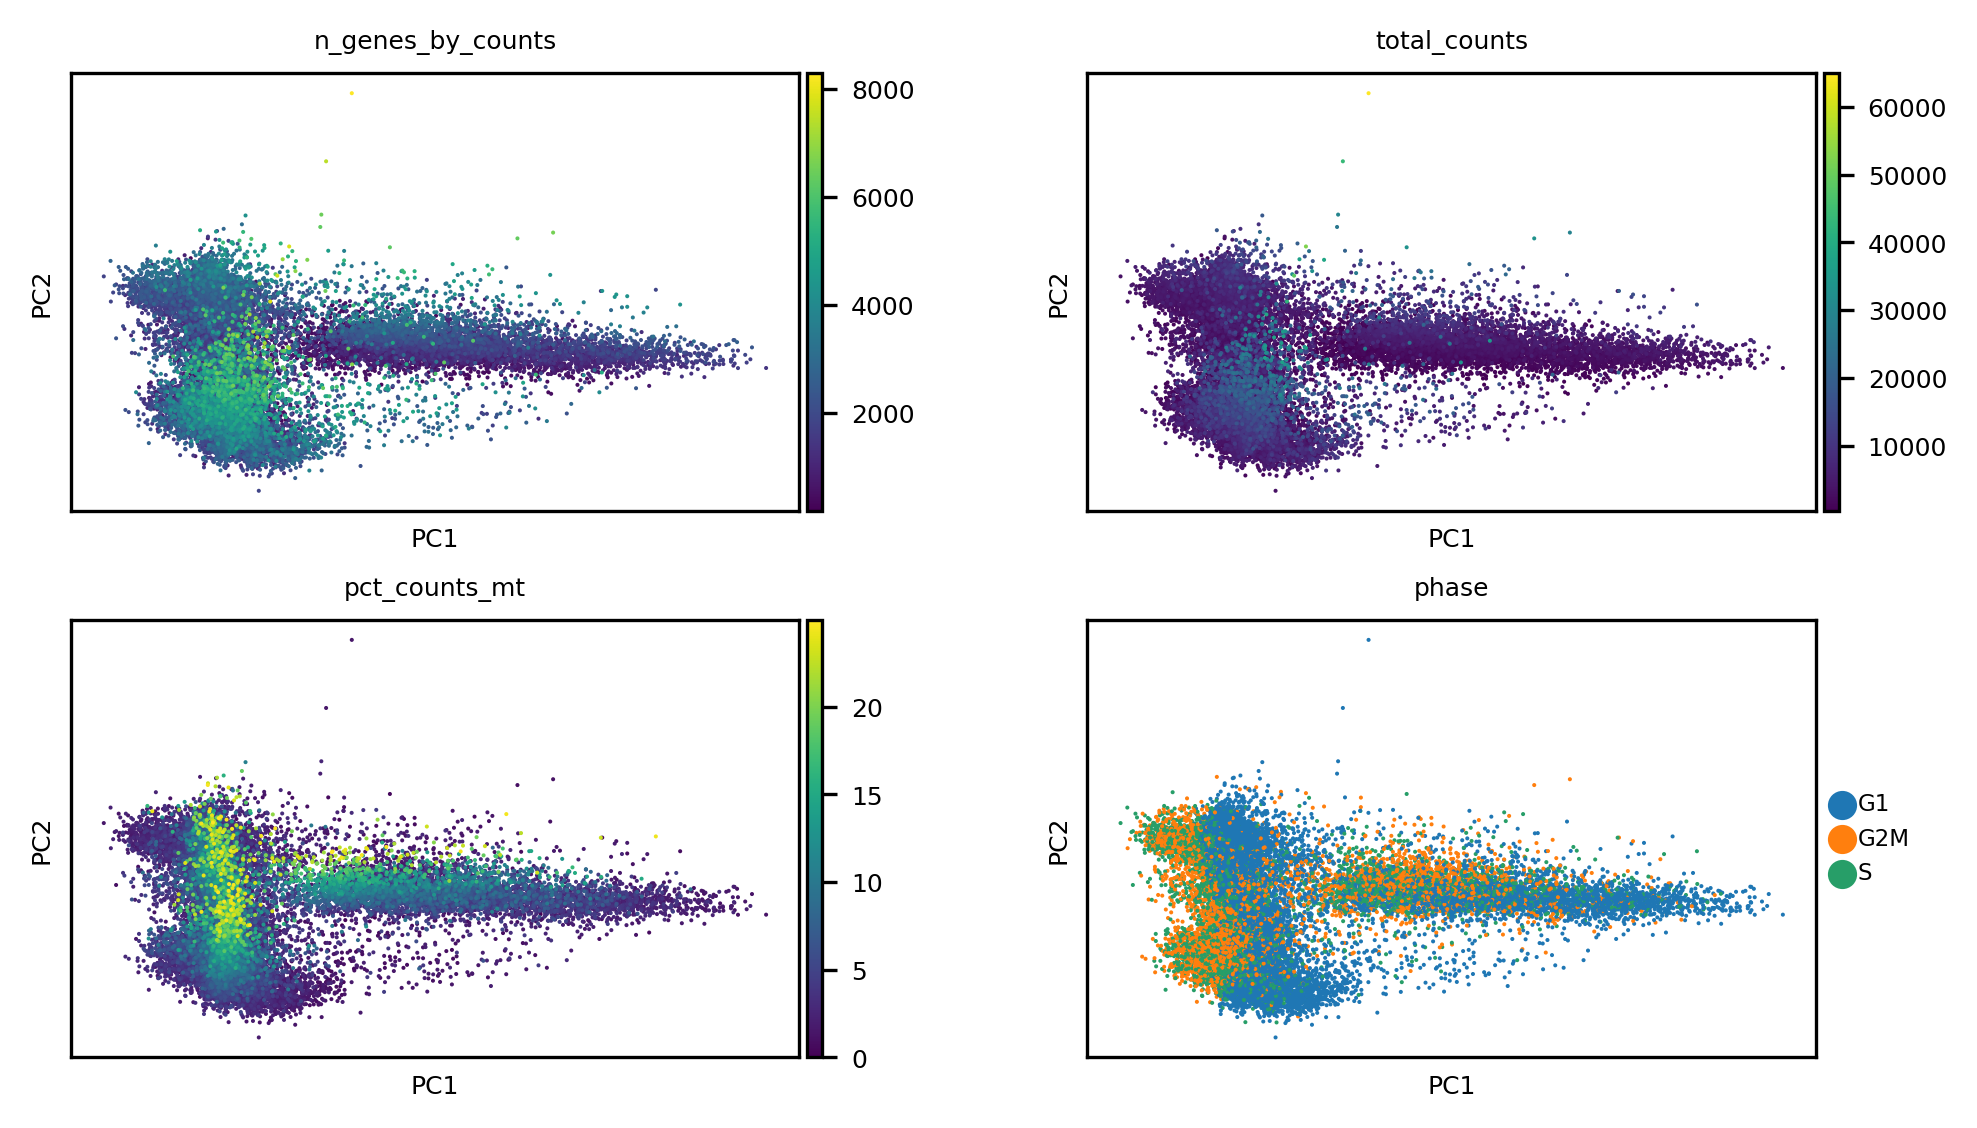

In [59]:
sc.pl.pca(heart_infection_sc, color = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'phase'], ncols=2)

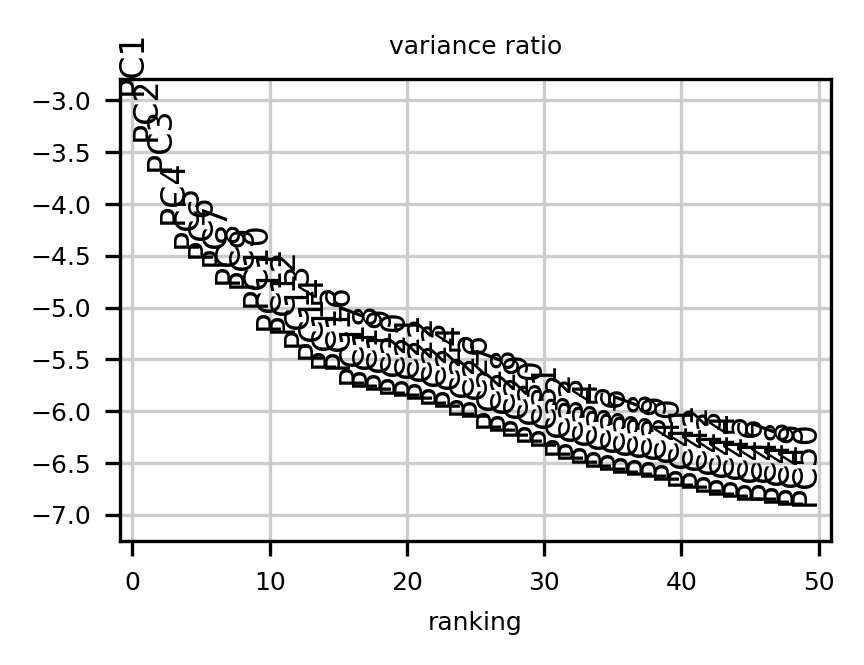

In [60]:
sc.pl.pca_variance_ratio(heart_infection_sc, n_pcs = 50, log=True)

In [69]:
sc.pp.neighbors(heart_infection_sc, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [ ]:
sc.tl.umap(heart_infection_sc)

computing UMAP


In [ ]:
sc.pl.umap(heart_infection_sc, color = ['n_genes_by_counts', 'total_counts', 'total_viral', "phase", "pct_counts_mt"], ncols=3)

In [63]:
sc.tl.embedding_density(heart_infection_sc, groupby = "condition")

computing density on 'umap'
--> added
    'umap_density_condition', densities (adata.obs)
    'umap_density_condition_params', parameter (adata.uns)


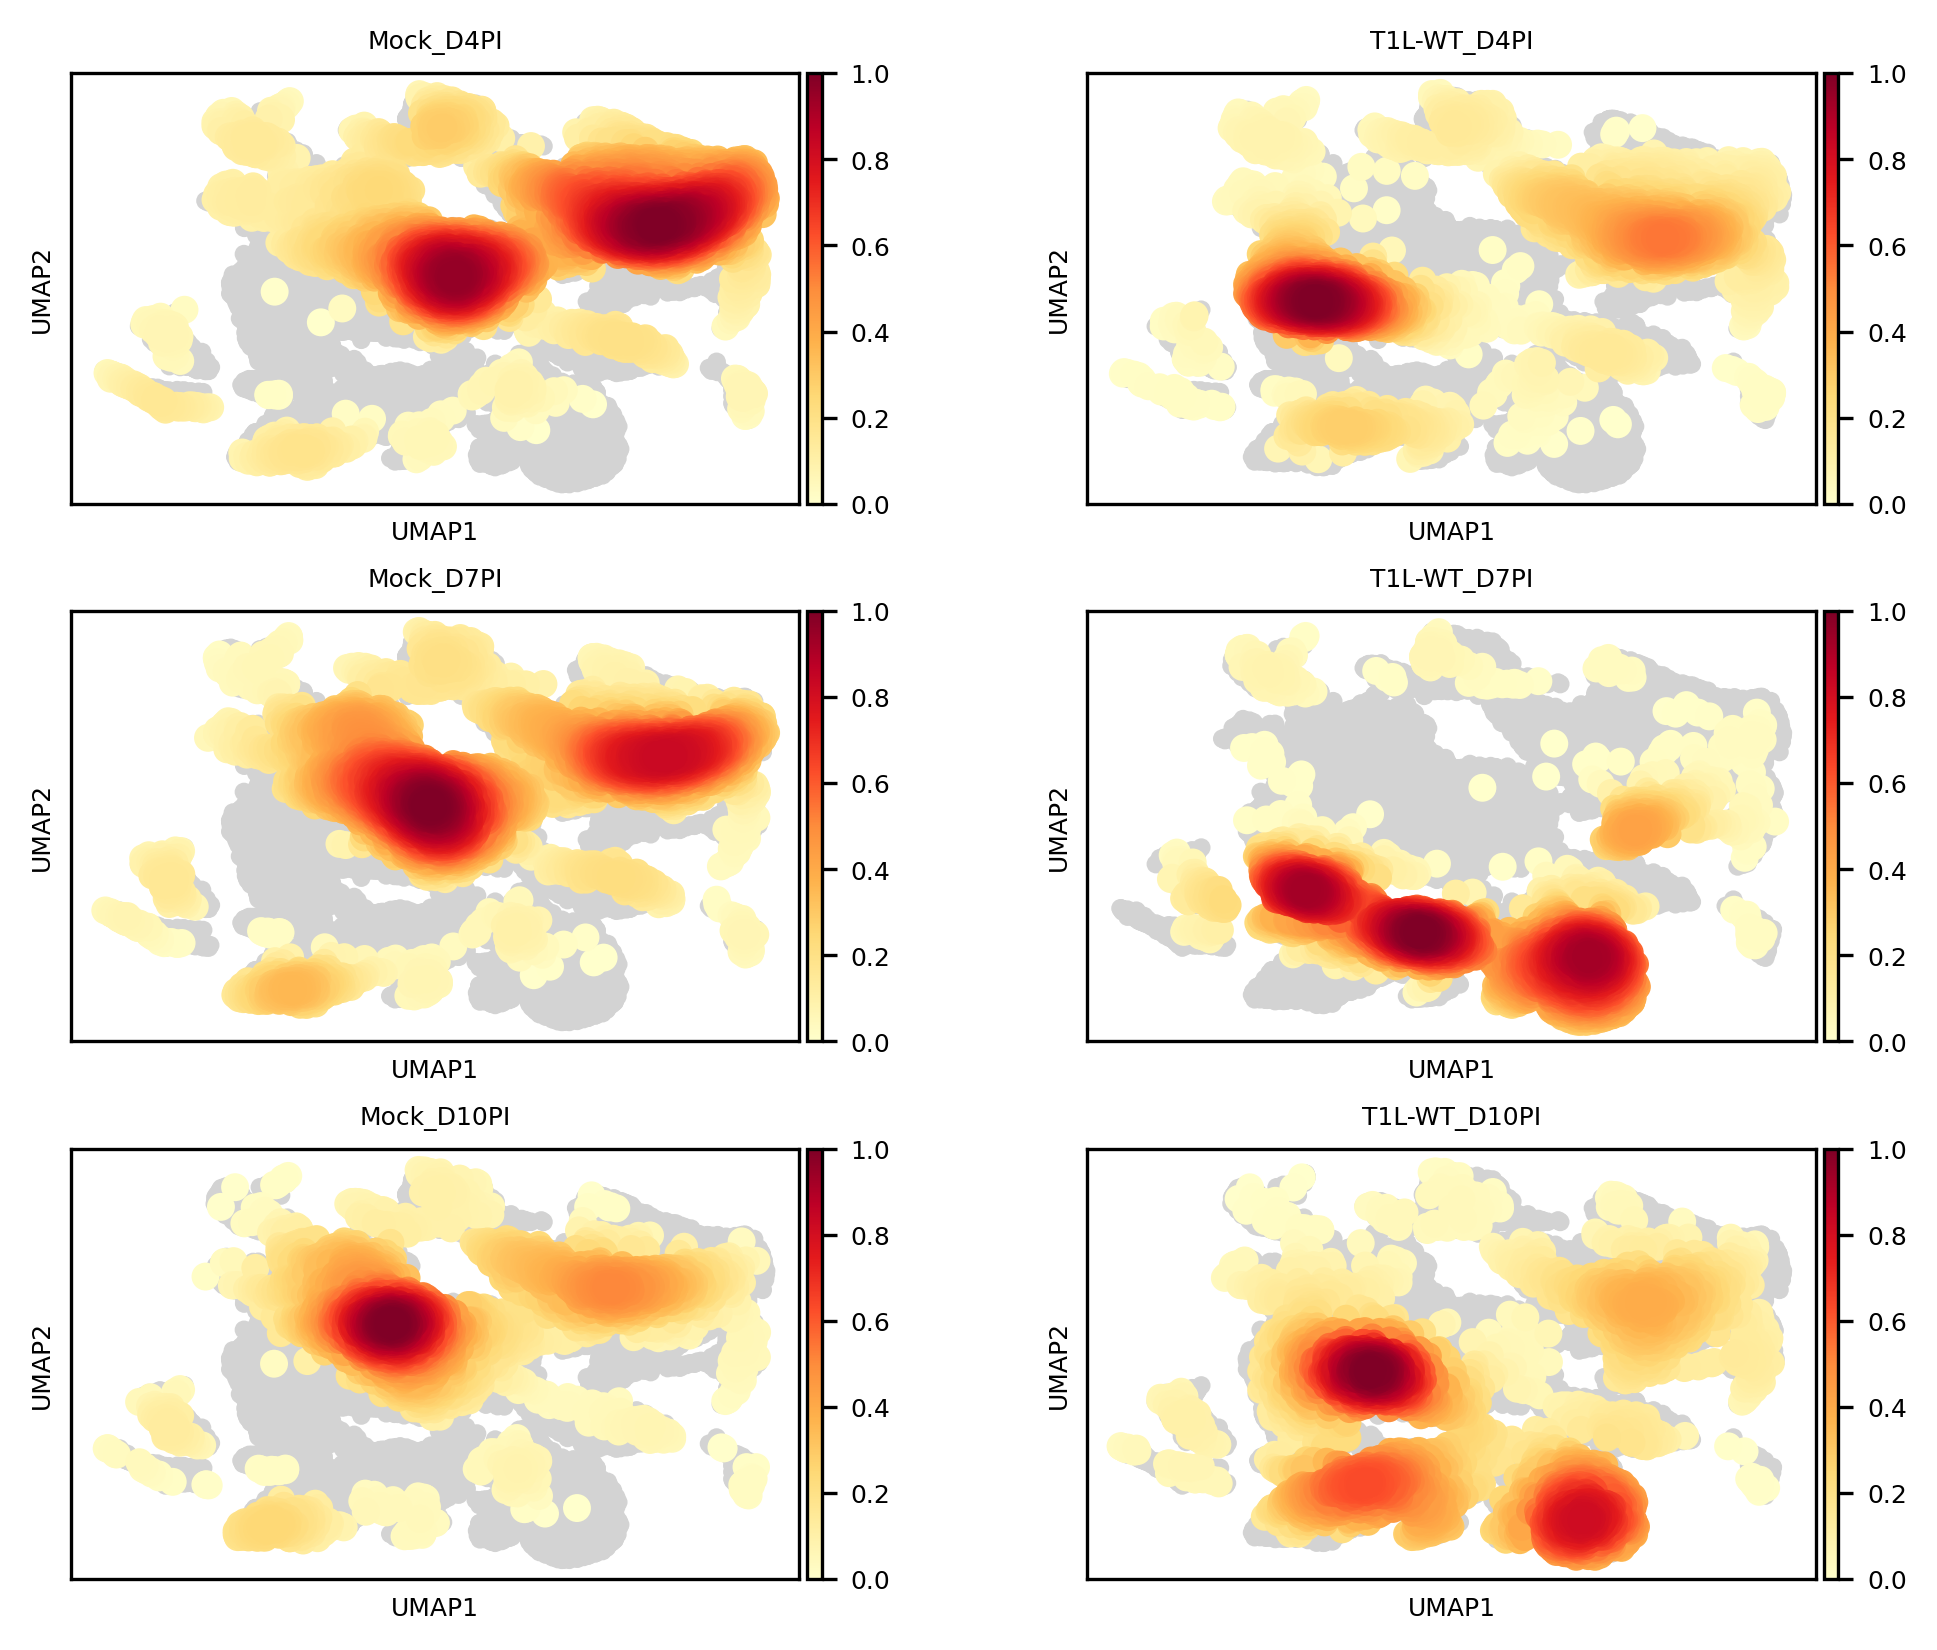

In [66]:
heart_infection_sc.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "T1L-WT_D4PI",  "Mock_D7PI",  "T1L-WT_D7PI",  "Mock_D10PI", "T1L-WT_D10PI"], inplace = True)
sc.pl.embedding_density(heart_infection_sc, groupby = "condition", ncols=2) 

In [10]:
sc.tl.leiden(heart_infection_sc_4samples_no_viral_genes, key_added="leiden_0.5", resolution = 0.5)
sc.tl.leiden(heart_infection_sc_4samples_no_viral_genes, key_added="leiden_0.3", resolution = 0.3)
sc.tl.leiden(heart_infection_sc_4samples_no_viral_genes, key_added="leiden_0.1", resolution = 0.1)

running Leiden clustering
    finished: found 23 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:03)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:02)


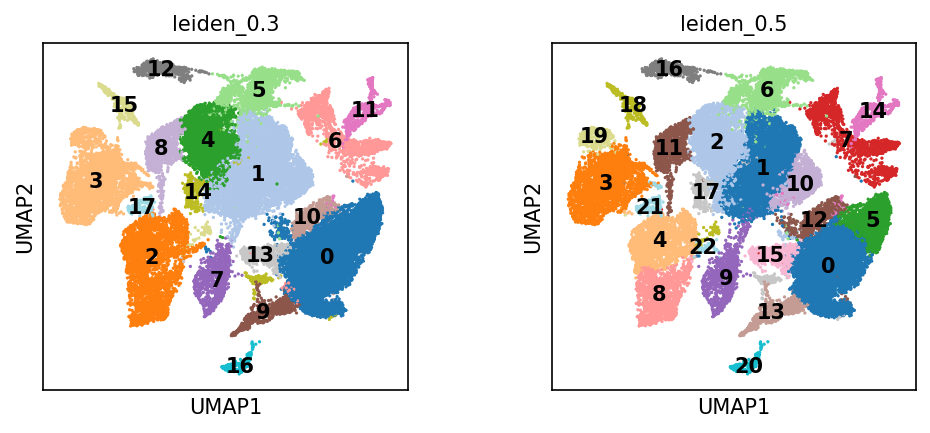

In [11]:
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color = ['leiden_0.3', 'leiden_0.5'], legend_loc='on data', size=10, palette="tab20")

In [348]:
heart_infection_sc_4samples_no_viral_genes.write_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes.h5ad")


In [288]:
heart_infection_sc_4samples_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes.h5ad")

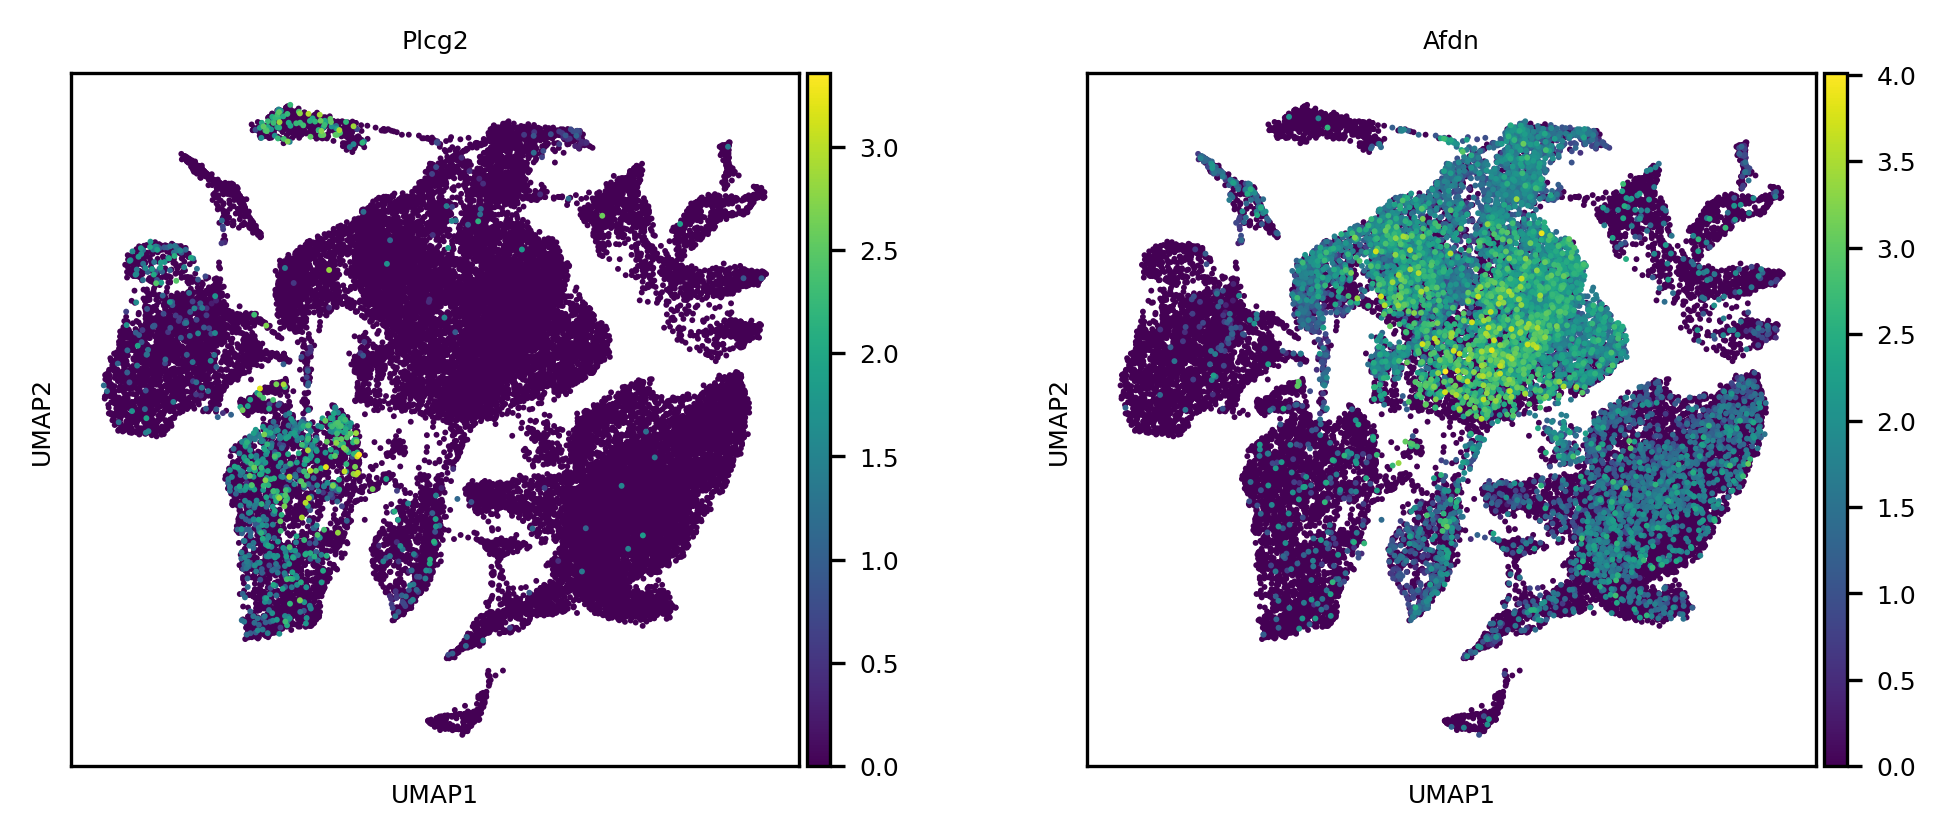

In [86]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=False, format="pdf")
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color=["Plcg2", "Afdn"], ncols= 5, size=8)

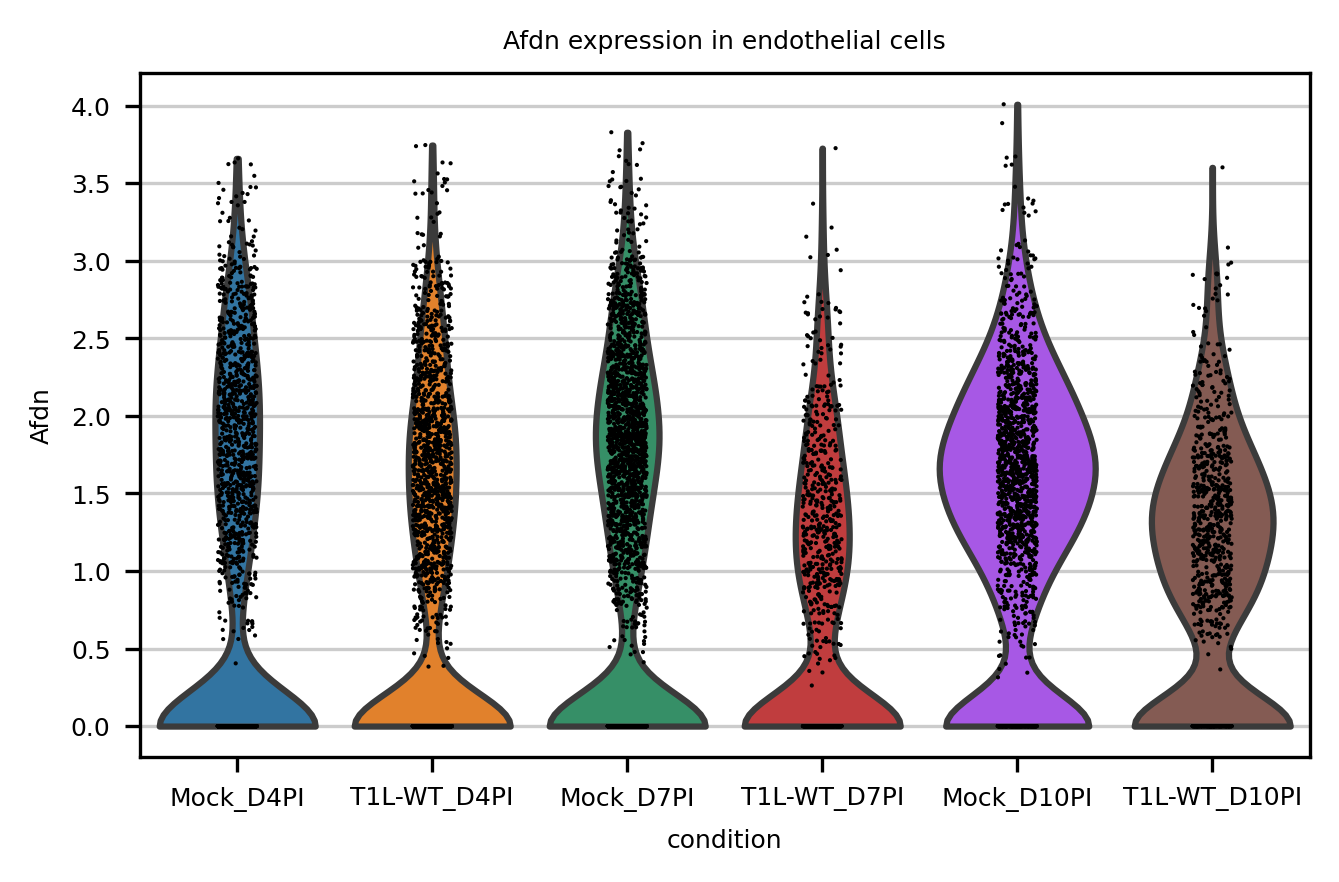

In [89]:
heart_infection_sc_4samples_no_viral_genes.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "T1L-WT_D4PI",  "Mock_D7PI",  "T1L-WT_D7PI",  "Mock_D10PI", "T1L-WT_D10PI"], inplace = True)
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(5, 3), transparent=False, format="pdf")
fig, ax = plt.subplots()
sc.pl.violin(heart_infection_sc_4samples_no_viral_genes[heart_infection_sc_4samples_no_viral_genes.obs["celltype_groups"].isin(["Endothelial cells"]),], keys=["Afdn"], groupby="condition", show=False, ax = ax)
plt.title("Afdn expression in endothelial cells")
plt.show()

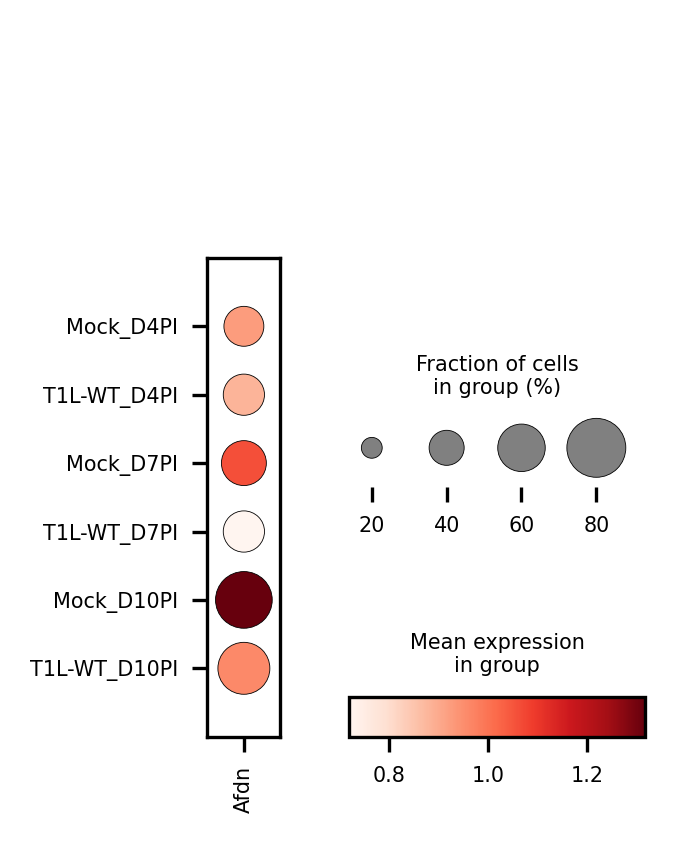

In [90]:
sc.pl.dotplot(heart_infection_sc_4samples_no_viral_genes[heart_infection_sc_4samples_no_viral_genes.obs["celltype_groups"].isin(["Endothelial cells"]),], var_names=["Afdn"], groupby="condition")

In [351]:
sc.tl.rank_genes_groups(heart_infection_sc_4samples_no_viral_genes, 'leiden_0.3', method='wilcoxon', key_added='rank_genes_groups_leiden_0.3')
sc.tl.rank_genes_groups(heart_infection_sc_4samples_no_viral_genes, 'leiden_0.5', method='wilcoxon', key_added='rank_genes_groups_leiden_0.5')

ranking genes
    finished: added to `.uns['rank_genes_groups_leiden_0.3']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:46)
ranking genes
    finished: added to `.uns['rank_genes_groups_leiden_0.5']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:48)


In [352]:
sc.tl.dendrogram(heart_infection_sc_4samples_no_viral_genes, "leiden_0.5", n_pcs=20)

    using 'X_pca' with n_pcs = 20
Storing dendrogram info using `.uns['dendrogram_leiden_0.5']`


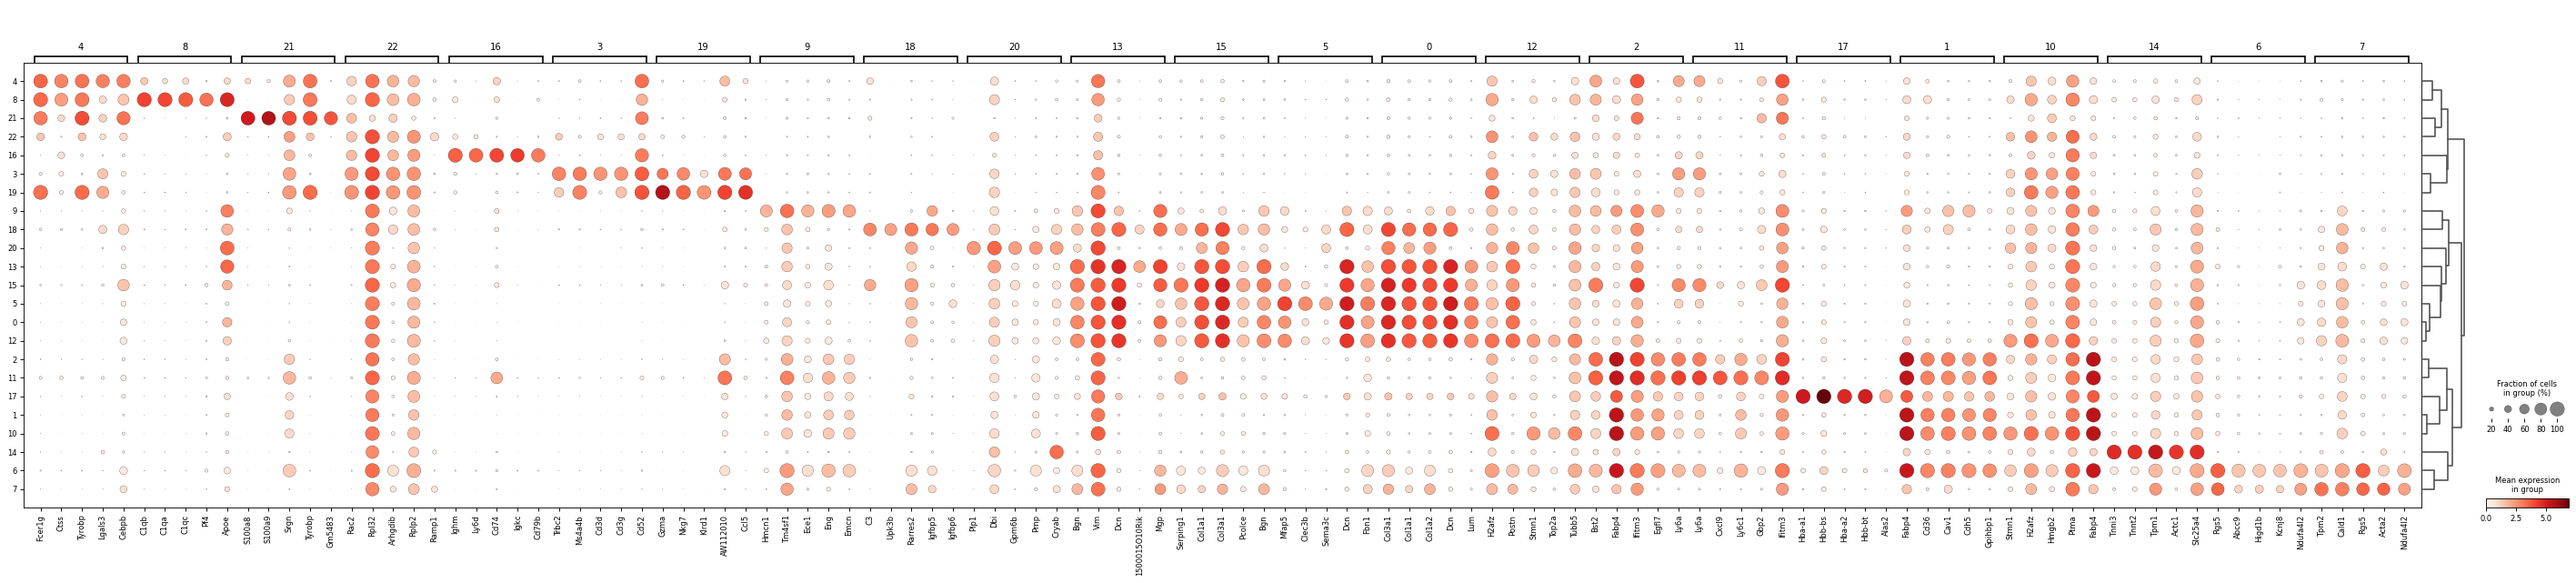

In [364]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=9, frameon=True, figsize=(3, 3), transparent=True, format="pdf")
sc.pl. (heart_infection_sc_4samples_no_viral_genes, key= "rank_genes_groups_leiden_0.5", n_genes=5)
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, format="pdf")

In [7]:
pd.DataFrame(heart_infection_sc_4samples_no_viral_genes.uns['rank_genes_groups_leiden_0.5']['names']).head(40)

0         1        2         3         4         5         6  \
0    Col3a1     Fabp4     Bst2     Trbc2    Fcer1g     Mfap5      Rgs5   
1    Col1a1      Cd36    Fabp4    Ms4a4b      Ctss    Clec3b     Abcc9   
2    Col1a2      Cav1   Ifitm3      Cd3d    Tyrobp    Sema3c    Higd1b   
3       Dcn      Cdh5    Egfl7      Cd3g    Lgals3       Dcn     Kcnj8   
4       Lum   Gpihbp1     Ly6a      Cd52     Cebpb      Fbn1  Ndufa4l2   
5     Mfap4      Mgll    Iigp1    Coro1a      Cyba     Fstl1   Colec11   
6       Bgn   Sparcl1    H2-K1   Ptprcap      Cd52     Pcsk6    Pdgfrb   
7     Postn    Col4a1     Cav1      Rac2     Prdx5   Adamts5    Steap4   
8     Fstl1       Kdr  Gpihbp1      Nkg7      Spi1       Dpt     Sept4   
9       Dpt   Tspan13    H2-D1     Ptprc      Ctsc       Gsn       Vtn   
10  Col14a1    Cavin2     Cd36   Arhgdib      Lyz2      Aspn   Gm13889   
11      Mdk      Cd93      B2m      Trac     Plac8     Timp2    Apold1   
12   Col6a1    Pecam1    Rsad2      Ccl5    Ms4a6c    S100a6    Cox4i2   
13     Rbp1     Cldn5     Gbp7    Tmsb4x      Lst1     Itih5     Itga1   
14   Igfbp7     Gng11     Ly6e      Gzmb    Ms4a4c     Itm2a     Mfge8   
15      Mgp    Col4a2    Icam2  AW112010      Ftl1   S100a10       Nes   
16   Col5a1      Kitl     Cdh5    Ms4a6b  Ifi27l2a       Axl   Sparcl1   
17     Aspn      Tcf4     Rgcc  Sh3bgrl3       B2m      Pi16      Mgll   
18      Gsn     Egfl7    Ly6c1    Epsti1      Fth1       Lum      Gjc1   
19    Mfap5     Tcf15    Cldn5       Lck      Ctsb     Fbln2     Epas1   
20    Loxl1     Myct1    Gng11      Pfn1    Coro1a     Cd248   Tspan13   
21     Rcn3      Rgcc    Isg15     Rps11   Alox5ap    Col3a1     Myo1b   
22     Fbn1     Fabp5      Kdr    Laptm5      Aif1      Cd34     Rflnb   
23   Igfbp4      Esam    Fabp5     Rpl32     Slfn2       Ogn    Col4a2   
24    Mfap2      Tcim    H2-Q7      Gzma    Laptm5     Postn      Mcam   
25   Col5a2      Ets1   Cavin2       Lat    Samhd1       Nov    Cavin2   
26      Eln    Adgrf5     Irf7      Actb      Actb      Ugp2  Slc9a3r2   
27      Ogn     Icam2     Cd93    Selplg      Psap     Lamc1     Gng11   
28   Col6a3      Flt1     Mgll     Fxyd5      Capg     Htra3    Col4a1   
29   Col6a2     Gnai2    Ifit2     Plac8      Zbp1      Islr     Cspg4   
30     Meg3  Slc9a3r2    Ifi44     Ly6c2     Ifi30    Col5a1    Adgrf5   
31      Fn1     Ptprb    Psmb8   Dnajc15      Cybb   Col14a1     Tcf15   
32    Sparc     Rflnb      Id1     H2-Q7    Ifi204     Fndc1      Cd93   
33     Ctsl     Ly6c1   Pecam1    Pycard      Irf7     Loxl2      Esam   
34     Mmp2    Sptbn1     Tcim      Lcp1     Fcgr1      Cd55      Plk2   
35   Lgals1    Adgrl4    Ecscr    Ptpn18     Fxyd5    Col1a2    Notch3   
36     Cd63     Aplp2   Ifi203       Cd2     Isg15    Col1a1      Cdh5   
37    Lama2     Aplnr    Myct1     Psmb8       Fyb      Nid1     Ptprb   
38     Nfix   mt-Rnr2     Xist     Skap1      Txn1      Tnxb      Art3   
39     Lhfp      Cd34    Cxcl9      Ctsw     Ptpn6  Ppp1r14b     Sox18   

           7        8         9  ...             13       14         15  \
0       Tpm2     C1qb     Hmcn1  ...            Bgn    Tnni3   Serping1   
1      Cald1     C1qa    Tm4sf1  ...            Vim    Tnnt2     Col1a1   
2       Rgs5     C1qc      Ece1  ...            Dcn     Tpm1     Col3a1   
3      Acta2      Pf4       Eng  ...  1500015O10Rik    Actc1     Pcolce   
4   Ndufa4l2     Apoe      Emcn  ...            Mgp  Slc25a4        Bgn   
5       Myl9   Fcer1g       H19  ...         Col5a2    Tnnc1      Iigp1   
6    Gucy1a1     Lgmn     Fabp5  ...            Cd9    Fabp3   Ifi27l2a   
7    Gm13889   Tyrobp       Cpe  ...          Tbx20       Mb         C3   
8      Csrp2     Ftl1     Aplp2  ...          Thbs1    Cox5a    Rarres2   
9      Tagln     Ctsc     Cgnl1  ...         Col1a2  Chchd10       Apod   
10      Mylk     Fth1      Ctsh  ...          Itih5    Csrp3     Col1a2   
11    Pdgfrb     Ctsb     Cdh11  ...           Dkk3    Cryab     Col5a1   


In [133]:
heart_infection_sc_4samples_no_viral_genes.obs["celltypes_leiden_0.3"] = heart_infection_sc_4samples_no_viral_genes.obs["leiden_0.3"]
heart_infection_sc_4samples_no_viral_genes.obs["celltypes_leiden_0.5"] = heart_infection_sc_4samples_no_viral_genes.obs["leiden_0.5"]
celltypes = {'0': "Fibroblasts", 
                '1': "Endothelial cells", 
                '2': "Inflamed endothelial cells", 
                '3': "T-cells",
                '4': "Dendritic cells",
                '5': "Fibroblasts",
                '7': "Mural cells",
                '8': "Macrophages", 
                '11': "Cxcl9-high inflamed\n endothelial cells",
                '6': "Mesenchymal endothelial cells",
                '10': "Endothelial cells",
                '9': "Endocardial cells",
                '14': "Cardiomyocytes",
                '12': "Fibroblasts",
                '15': "Ccl2+ fibroblasts",
                '13': "Fibroblasts",
                '16': "B-cells",
                '17': "Erythroblasts",
                '18': "Pericardial cells",
                '19': "NK cells",
                '20': "Oligodendrocytes",
                '21': "Neutrophils",
                '22': "Neutrophils"}
heart_infection_sc_4samples_no_viral_genes.obs["celltypes_leiden_0.5"] = heart_infection_sc_4samples_no_viral_genes.obs["celltypes_leiden_0.5"].map(celltypes).astype("category")

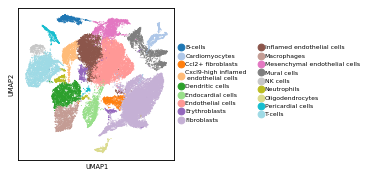

In [135]:
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color = ['celltypes_leiden_0.5'], palette="tab20", title="")

In [121]:
clusters_colors = dict(
    zip([str(i) for i in range(18)], heart_infection_sc_4samples_no_viral_genes.uns["celltypes_leiden_0.5_colors"])
)
final_dict = dict(zip(list(heart_infection_sc_4samples_no_viral_genes.obs["celltypes_leiden_0.5"].cat.categories), list(clusters_colors.values())))
final_dict
import pickle
with open('celltypes_leiden_0.5_colors.pickle', 'wb') as handle:
    pickle.dump(final_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

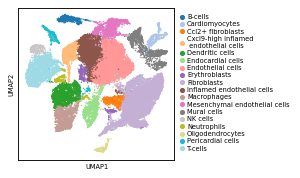

In [122]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (2.5, 2.5))
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color = ['celltypes_leiden_0.5'], size=6, palette="tab20", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap4samples_celltypes_05.pdf")

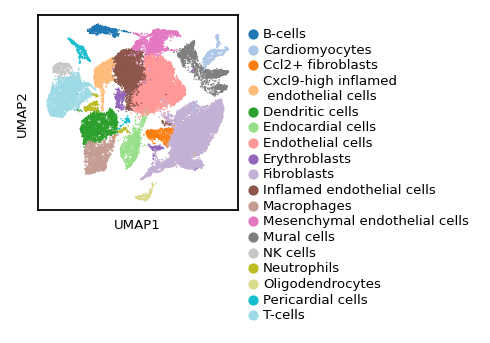

In [10]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.6, 1.6))
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color = ['celltypes_leiden_0.5'], size=2, palette="tab20", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap4samples_celltypes_05_small.pdf")

In [123]:
heart_infection_sc_4samples_no_viral_genes.write_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes.h5ad")

In [137]:
heart_infection_sc_4samples_no_viral_genes.obs["celltype_groups"] = heart_infection_sc_4samples_no_viral_genes.obs["leiden_0.5"]
celltype_groups = {'0': "Fibroblasts", 
                '1': "Endothelial cells", 
                '2': "Endothelial cells", 
                '3': "T-cells",
                '4': "Dendritic cells",
                '5': "Fibroblasts",
                '7': "Mural cells",
                '8': "Macrophages", 
                '11': "Endothelial cells",
                '6': "Endothelial cells",
                '10': "Endothelial cells",
                '9': "Endocardial cells",
                '14': "Cardiomyocytes",
                '12': "Fibroblasts",
                '15': "Fibroblasts",
                '13': "Fibroblasts",
                '16': "B-cells",
                '17': "Erythroblasts",
                '18': "Pericardial cells",
                '19': "NK cells",
                '20': "Oligodendrocytes",
                '21': "Neutrophils",
                '22': "Neutrophils"}
heart_infection_sc_4samples_no_viral_genes.obs["celltype_groups"] = heart_infection_sc_4samples_no_viral_genes.obs["celltype_groups"].map(celltype_groups).astype("category")

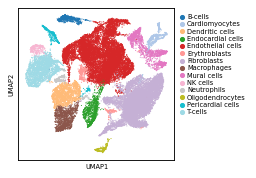

In [169]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (2.5, 2.5))
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color = ['celltype_groups'], legend_fontsize=6,  title="", show=False, ax = ax, palette="tab20")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/celltype_groups_umap.pdf")

In [128]:
heart_infection_sc_4samples_no_viral_genes.write_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes.h5ad")

In [262]:
sc.tl.rank_genes_groups(heart_infection_sc_4samples_no_viral_genes, 'celltypes_leiden_0.5', method='wilcoxon', key_added='rank_genes_groups_celltypes_leiden_0.5')

ranking genes
    finished: added to `.uns['rank_genes_groups_celltypes_leiden_0.5']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:15)


In [263]:
DGE_celltype_groups = pd.DataFrame(heart_infection_sc_4samples_no_viral_genes.uns['rank_genes_groups_celltypes_leiden_0.5']['names']).head(200)
DGE_celltype_groups.to_csv("DGE_celltypes_leiden_0.5.csv")

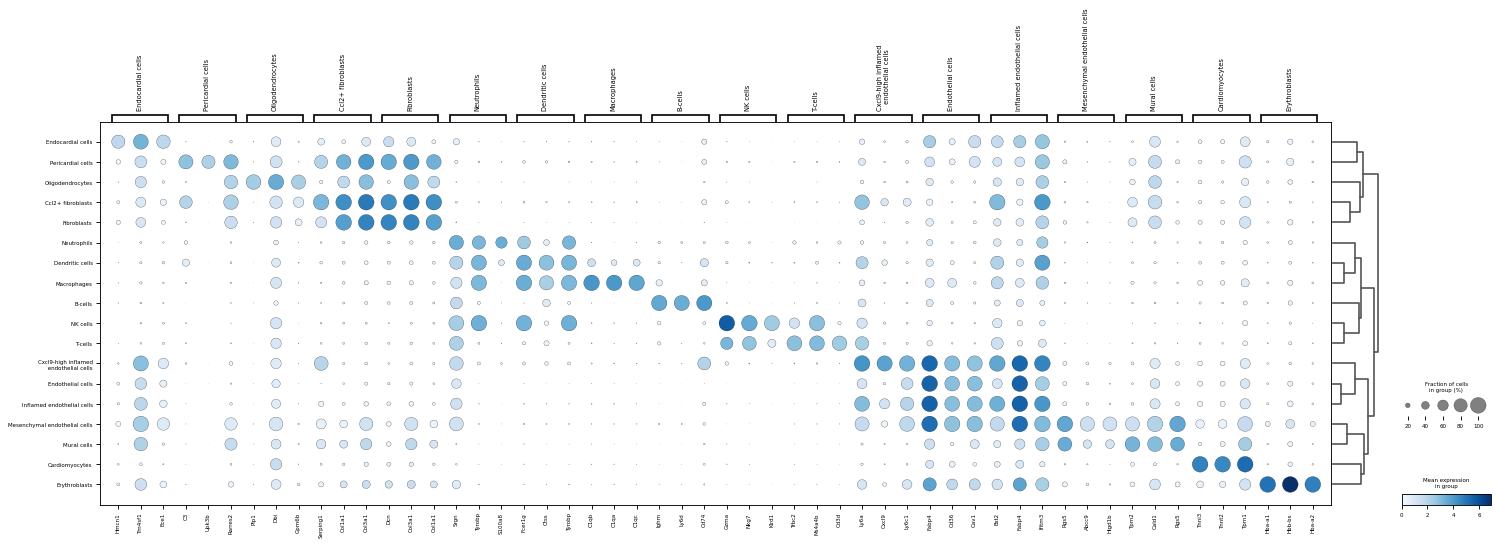

In [277]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), vector_friendly = False, transparent=True, format="pdf")
sc.pl.rank_genes_groups_dotplot(heart_infection_sc_4samples_no_viral_genes, key= "rank_genes_groups_celltypes_leiden_0.5", n_genes=3, cmap='Blues', save="4samples.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, format="pdf")

In [401]:
sc.tl.rank_genes_groups(heart_infection_sc_4samples_no_viral_genes, groupby = 'condition', groups= ["T1L-WT_D4PI"],
                        reference= 'Mock_D4PI', key_added='rank_genes_T1L-WT_vs_Mock_D4PI',
                        method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_Mock_D4PI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:19)


In [299]:
DGE_D4 = sc.get.rank_genes_groups_df(heart_infection_sc_4samples_no_viral_genes, key='rank_genes_T1L-WT_vs_Mock_D4PI', group=["T1L-WT_D4PI"])
DGE_D4.to_csv("DGE_D4.csv")
print(DGE_D4.tail(40))

           names     scores  logfoldchanges          pvals      pvals_adj
22717     Col4a2 -11.914286       -0.448966   9.971687e-33   1.260698e-30
22718      Hspa5 -12.161707       -0.367188   4.970930e-34   6.501348e-32
22719      Fbln2 -12.456625       -0.810767   1.287034e-35   1.722885e-33
22720     Col1a2 -12.460591       -0.789429   1.224593e-35   1.648998e-33
22721      Csrp2 -12.487262       -0.641921   8.761790e-36   1.186858e-33
22722     Zbtb20 -12.520641       -0.528362   5.756831e-36   7.892060e-34
22723        Dst -12.756004       -0.710672   2.886304e-37   4.054544e-35
22724    Col15a1 -12.934435       -0.710879   2.877301e-38   4.118159e-36
22725     Hnrnpu -12.947546       -0.494691   2.425849e-38   3.516244e-36
22726     mt-Nd1 -13.091201       -0.249128   3.697141e-39   5.428119e-37
22727      Fstl1 -13.150525       -0.583915   1.689977e-39   2.513648e-37
22728      Pbrm1 -13.336020       -0.721234   1.428882e-40   2.167804e-38
22729       Vcan -13.342556       -0.9

In [402]:
sc.tl.rank_genes_groups(heart_infection_sc_4samples_no_viral_genes, groupby = 'condition', groups= ["T1L-WT_D7PI"],
                        reference= 'Mock_D7PI', key_added='rank_genes_T1L-WT_vs_Mock_D7PI',
                        method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_Mock_D7PI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:19)


In [304]:
DGE_D7 = sc.get.rank_genes_groups_df(heart_infection_sc_4samples_no_viral_genes, key='rank_genes_T1L-WT_vs_Mock_D7PI', group=["T1L-WT_D7PI"])
DGE_D7.to_csv("DGE_D7.csv")
print(DGE_D7.tail(40))

          names     scores  logfoldchanges          pvals      pvals_adj
22717     Lamb1 -32.539600       -2.220177  2.938157e-232  4.548547e-230
22718    Fermt2 -32.649967       -1.923681  8.022204e-234  1.250420e-231
22719     Aplp2 -32.697170       -1.697969  1.713395e-234  2.689085e-232
22720     Anxa5 -32.781353       -1.315726  1.085914e-235  1.716122e-233
22721       Jun -32.982491       -1.481003  1.448078e-238  2.304469e-236
22722      Nrep -33.195576       -3.416575  1.247098e-241  2.012781e-239
22723      Ctsl -33.401711       -1.615909  1.294792e-244  2.104685e-242
22724    Ctnnb1 -33.474842       -1.809343  1.119966e-245  1.833603e-243
22725     Lamc1 -33.536411       -2.117483  1.420658e-246  2.342748e-244
22726   S100a16 -34.337303       -2.075089  2.179175e-258  3.756931e-256
22727     Itgb1 -34.801113       -1.392311  2.339812e-265  4.159929e-263
22728      Sox4 -35.389523       -2.852396  2.474772e-274  4.616261e-272
22729     Cald1 -35.577969       -2.104741  3.07067

In [403]:
sc.tl.rank_genes_groups(heart_infection_sc_4samples_no_viral_genes, groupby = 'condition', groups= ["T1L-WT_D10PI"],
                        reference= 'Mock_D10PI', key_added='rank_genes_T1L-WT_vs_Mock_D10PI',
                        method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_Mock_D10PI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


In [306]:
DGE_D10 = sc.get.rank_genes_groups_df(heart_infection_sc_4samples_no_viral_genes, key='rank_genes_T1L-WT_vs_Mock_D10PI', group=["T1L-WT_D10PI"])
DGE_D10.to_csv("DGE_D10.csv")
print(DGE_D10.tail(40))

          names     scores  logfoldchanges          pvals      pvals_adj
22717    Igfbp7 -19.637838       -1.545880   7.345882e-86   1.878317e-83
22718     Tnni3 -19.669788       -2.055055   3.914130e-86   1.012203e-83
22719  Slc9a3r2 -19.835178       -1.458825   1.479909e-87   3.962151e-85
22720    Cavin1 -19.935638       -1.204203   1.997416e-88   5.476531e-86
22721   Tspan13 -20.163506       -1.594601   2.048400e-90   5.754994e-88
22722      Aqp1 -20.396687       -2.407701   1.789354e-92   5.154473e-90
22723   S100a16 -20.463135       -1.183324   4.589110e-93   1.338902e-90
22724      Sox4 -20.814098       -1.380141   3.225502e-96   9.532826e-94
22725      Ier2 -21.137756       -1.090375   3.576868e-99   1.099983e-96
22726      Myl3 -21.168530       -1.990476   1.862777e-99   5.887670e-97
22727     Hspg2 -21.280096       -1.184363  1.735893e-100   5.563903e-98
22728    Zbtb20 -21.325506       -1.200693  6.583643e-101   2.171362e-98
22729      Klf2 -21.550179       -1.149121  5.27428

In [750]:
heart_infection_sc_4samples_no_viral_genes.write_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes.h5ad")

In [35]:
heart_infection_sc_4samples_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes.h5ad")


In [881]:
heart_infection_sc_4samples_no_viral_genes

AnnData object with n_obs × n_vars = 31684 × 2247
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.8', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'leiden_0.4', 'leiden_0.45', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_groups_colors', 'celltypes_leiden_0.3_colors', 'celltypes_leiden_0.5_colors', 'condition_colors', 'dendrogram_leiden_0.5', 'hvg', 'leiden', 'leiden_0.3_colors', 'leiden_0.45_colors', 'leiden_0.4_colors', 'lei

In [992]:
# Mock_Heart_D4PI_xGen = sc.read_10x_h5('./../ReoT1L_xGen/Heart_Mock_D4PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D4PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/filtered_feature_bc_matrix.h5')
# Mock_Heart_D7PI_xGen = sc.read_10x_h5('./../ReoT1L_xGen/Heart_Mock_D7PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/filtered_feature_bc_matrix.h5')
# Mock_Heart_D10PI_xGen = sc.read_10x_h5('./../ReoT1L_xGen/Heart_Mock_D10PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D10PI_xGen//outs/filtered_feature_bc_matrix.h5')

T1L_K287T_Heart_D4PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D4PI_xGen/outs/filtered_feature_bc_matrix.h5')
T1L_K287T_Heart_D7PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D7PI_xGen/outs/filtered_feature_bc_matrix.h5')
T1L_K287T_Heart_D10PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D10PI_xGen/outs/filtered_feature_bc_matrix.h5')

# Mock_Heart_D4PI_xGen.var_names_make_unique()
T1L_WT_Heart_D4PI_xGen3.var_names_make_unique()
# Mock_Heart_D7PI_xGen.var_names_make_unique()
T1L_WT_Heart_D7PI_xGen3.var_names_make_unique()
# Mock_Heart_D10PI_xGen.var_names_make_unique()
T1L_WT_Heart_D10PI_xGen3.var_names_make_unique()

T1L_K287T_Heart_D4PI_xGen3.var_names_make_unique()
T1L_K287T_Heart_D7PI_xGen3.var_names_make_unique()
T1L_K287T_Heart_D10PI_xGen3.var_names_make_unique()

samples_xGen3 = ["Heart_T1L-WT_D4PI", "Heart_T1L-K287T_D4PI", "Heart_T1L-WT_D7PI", "Heart_T1L-K287T_D7PI", "Heart_T1L-WT_D10PI", "Heart_T1L-K287T_D10PI"]

heart_infection_sc_xGen3_subset = T1L_WT_Heart_D4PI_xGen3.concatenate(T1L_K287T_Heart_D4PI_xGen3, 
                                                    T1L_WT_Heart_D7PI_xGen3,
                                                    T1L_K287T_Heart_D7PI_xGen3, 
                                                    T1L_WT_Heart_D10PI_xGen3,
                                                    T1L_K287T_Heart_D10PI_xGen3,
                                                    batch_key= "sample", batch_categories=samples_xGen3,
                                                    index_unique="-")

reading ./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:03)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading ./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading ./../scData/sc_xGen22/Heart_T1L_D10PI_xGen//outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading ./../scData/sc_xGen22/Heart_K287T_D4PI_xGen/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. 

In [993]:
reoviral_genes = [name for name in heart_infection_sc_xGen3_subset.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc_xGen3_subset[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
# reoviral_genes_indicator = np.in1d(heart_infection_sc_xGen2_subset.var_names, reoviral_genes)
# heart_infection_sc_xGen2_no_viral_genes = heart_infection_sc_xGen2_subset[:, ~reoviral_genes_indicator]
# heart_infection_sc_xGen2_viral_genes_only = heart_infection_sc_xGen2_subset[:, reoviral_genes_indicator]

viral_expression.columns = [name + "_xGen3" for name in viral_expression.columns]

print(heart_infection_sc_4samples_no_viral_genes.obs.shape)
heart_infection_sc_4samples_no_viral_genes.obs = heart_infection_sc_4samples_no_viral_genes.obs.join(viral_expression)
print(heart_infection_sc_4samples_no_viral_genes.obs.shape)
heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3'] = viral_expression.sum(axis=1).astype(int)

heart_infection_sc_4samples_no_viral_genes.obs['total_viral_NA'] = heart_infection_sc_4samples_no_viral_genes.obs['total_viral']
heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_NA'] = heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3']
heart_infection_sc_4samples_no_viral_genes.obs['total_viral_NA'][heart_infection_sc_4samples_no_viral_genes.obs['total_viral_NA']==0] = np.nan
heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_NA'][heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_NA']==0] = np.nan
heart_infection_sc_4samples_no_viral_genes.obs['pct_viral_xGen3'] = ((heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_NA']) / (heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_NA'] + heart_infection_sc_4samples_no_viral_genes.obs['total_counts'])) * 100


['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(31684, 35)
(31684, 45)


<ipython-input-993-5c8788256cf0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-993-5c8788256cf0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [994]:
print(np.sum(heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_NA"] > 0))
heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh2"] = heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_NA"]
heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh2"][(heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh2"] < 2)] = np.NaN
heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh3"] = heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_NA"]
heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh3"][(heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh3"] < 3)] = np.NaN
heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh4"] = heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_NA"]
heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh4"][(heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh4"] < 4)] = np.NaN

heart_infection_sc_4samples_no_viral_genes.obs['pct_viral_xGen3_thresh2'] = ((heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_thresh2']) / (heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_thresh2'] + heart_infection_sc_4samples_no_viral_genes.obs['total_counts'])) * 100
heart_infection_sc_4samples_no_viral_genes.obs['pct_viral_xGen3_thresh3'] = ((heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_thresh2']) / (heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_thresh3'] + heart_infection_sc_4samples_no_viral_genes.obs['total_counts'])) * 100
heart_infection_sc_4samples_no_viral_genes.obs['pct_viral_xGen3_thresh4'] = ((heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_thresh2']) / (heart_infection_sc_4samples_no_viral_genes.obs['total_viral_xGen3_thresh4'] + heart_infection_sc_4samples_no_viral_genes.obs['total_counts'])) * 100

1853


<ipython-input-994-804121508a41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-994-804121508a41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-994-804121508a41>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


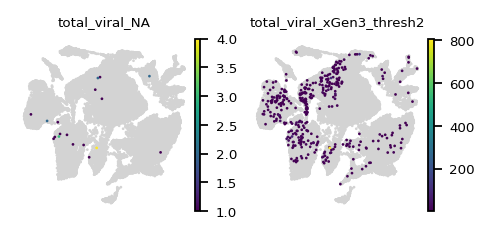

In [15]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(1.4,1.4), transparent=True, format="pdf")
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color=["total_viral_NA",  "total_viral_xGen3_thresh2"], size = 6, ncols=2, palette='viridis_r', add_outline=False, frameon=False, wspace=0.2, save="viral_trop_umap_xgen_filtered.pdf")

In [1147]:
heart_infection_sc_4samples_no_viral_genes.write_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes2.h5ad")

In [52]:
heart_infection_sc_4samples_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes2.h5ad")
heart_infection_sc_4samples_no_viral_genes

AnnData object with n_obs × n_vars = 31684 × 2247
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.8', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'leiden_0.4', 'leiden_0.45', 'celltype_groups', 'T1LReoS1_xGen3', 'T1LReoS2_xGen3', 'T1LReoS3_xGen3', 'T1LReoS4_xGen3', 'T1LReoM1_xGen3', 'T1LReoM2_xGen3', 'T1LReoM3_xGen3', 'T1LReoL1_xGen3', 'T1LReoL2_xGen3', 'T1LReoL3_xGen3', 'total_viral_xGen3', 'total_viral_NA', 'total_viral_xGen3_NA', 'pct_viral_xGen3', 'total_viral_xGen3_thresh2', 'total_viral_xGen3_thresh3', 'total_viral_xGen3_thresh4', 'pct_viral_xGen3_thresh2', 'pct_viral_xGen3_thresh3', 'pct_viral_xGen3_thresh4'
    var: 'gene_i

In [53]:
infected_heart_sc = heart_infection_sc_4samples_no_viral_genes.obs[heart_infection_sc_4samples_no_viral_genes.obs["condition"].isin(["T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"])]
infected_heart_sc["condition"] = infected_heart_sc["condition"].astype("string")

<ipython-input-53-7d551f697df8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


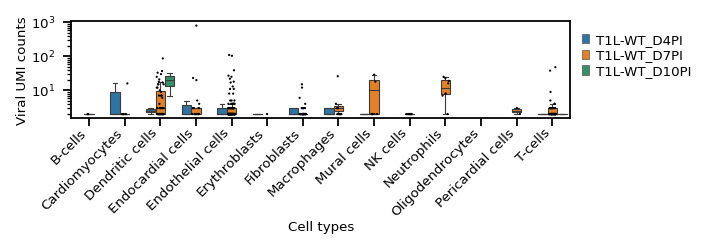

In [54]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (4,0.8))
plt.grid(b=None)
# plt.margins(x=0, y=0)
plt.rc('font', size=6)
sns.boxplot(data=infected_heart_sc, x="celltype_groups", y="total_viral_xGen3_thresh2", hue="condition", orient="v", linewidth=0.5, fliersize=0.0, ax = ax)
sns.stripplot(data=infected_heart_sc, x="celltype_groups", y="total_viral_xGen3_thresh2", color="black", size=1.0)
ax.set(yscale = "log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.tick_params(axis='x', pad=0)
ax.tick_params(axis='x', pad=0)
plt.xlabel("Cell types", labelpad = 1)
plt.ylabel("Viral UMI counts", labelpad=1)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.savefig("figures/viral_tropism_boxplot.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [59]:
heart_infection_sc_4samples_no_viral_genes.obs["viral_exp"] = heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3_thresh2"]
mean_viral_exp = heart_infection_sc_4samples_no_viral_genes.obs[["condition", "celltype_groups", "viral_exp"]].groupby(["condition", "celltype_groups"]).mean()["viral_exp"]
celltype_counts = heart_infection_sc_4samples_no_viral_genes.obs.value_counts(subset=["condition", "celltype_groups"])
infected_cells_only = heart_infection_sc_4samples_no_viral_genes[heart_infection_sc_4samples_no_viral_genes.obs["viral_exp"] >= 0, :]
infected_cells_only
infected_cells_only.obs["condition"] = infected_cells_only.obs["condition"].cat.set_categories(heart_infection_sc_4samples_no_viral_genes.obs["condition"].cat.categories)
infected_cells_only.obs["celltype_groups"] = infected_cells_only.obs["celltype_groups"].cat.set_categories(heart_infection_sc_4samples_no_viral_genes.obs["celltype_groups"].cat.categories)
infected_celltypes_counts = infected_cells_only.obs.value_counts(subset=["condition", "celltype_groups"])
count_data = pd.DataFrame({'mean_viral_exp': mean_viral_exp, 'total_counts': celltype_counts, 'infected_counts': infected_celltypes_counts})
count_data["pct_cells"] = round(((count_data["infected_counts"]/count_data["total_counts"]) * 100), 2)
count_data = count_data.iloc[count_data.index.get_level_values('condition').isin(["T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"])]
celltype_counts = count_data.unstack("celltype_groups")
celltype_counts = celltype_counts.reindex(["T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"])
celltype_counts

Trying to set attribute `.obs` of view, copying.


mean_viral_exp                                 \
celltype_groups        B-cells Cardiomyocytes Dendritic cells   
condition                                                       
T1L-WT_D4PI                NaN       6.666667        2.500000   
T1L-WT_D7PI                2.0       2.000000        8.352941   
T1L-WT_D10PI               NaN            NaN       20.000000   

                                                                               \
celltype_groups Endocardial cells Endothelial cells Erythroblasts Fibroblasts   
condition                                                                       
T1L-WT_D4PI             83.100000          6.505495           2.0    3.172414   
T1L-WT_D7PI              6.666667          2.454545           NaN    2.214286   
T1L-WT_D10PI                  NaN               NaN           NaN         NaN   

                                                  ...         pct_cells  \
celltype_groups Macrophages Mural cells NK cells  ... Endothelial cells   
condition                                         ...                     
T1L-WT_D4PI        4.454545        2.00      NaN  ...              3.78   
T1L-WT_D7PI        3.000000       12.75      2.0  ...              6.42   
T1L-WT_D10PI            NaN         NaN      NaN  ...               NaN   

                                                                            \
celltype_groups Erythroblasts Fibroblasts Macrophages Mural cells NK cells   
condition                                                                    
T1L-WT_D4PI              1.18        1.42        2.95        1.68      NaN   
T1L-WT_D7PI               NaN        2.66        4.08        4.04     3.54   
T1L-WT_D10PI              NaN         NaN         NaN         NaN      NaN   

                                                                        
celltype_groups Neutrophils Oligodendrocytes Pericardial cells T-cells  
condition                                                               
T1L-WT_D4PI             NaN              NaN               NaN    1.96  
T1L-WT_D7PI            5.63              NaN              5.88    4.32  
T1L-WT_D10PI            NaN              NaN               NaN    0.15  

[3 rows x 56 columns]

In [60]:
celltype_counts["mean_viral_exp"].to_csv("./../csvs/heart_mean_viral_exp.csv")
celltype_counts["pct_cells"].to_csv("./../csvs/heart_pct_cells.csv")

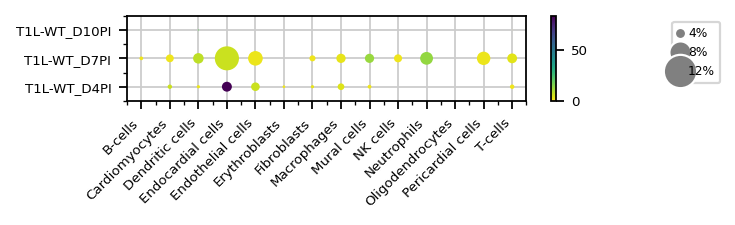

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
plt.rcParams['axes.axisbelow'] = True

N = celltype_counts["pct_cells"].shape[0]
M = celltype_counts["pct_cells"].shape[1]
ylabels = celltype_counts["pct_cells"].index
xlabels = celltype_counts["pct_cells"].columns

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = celltype_counts["pct_cells"].fillna(0).to_numpy()
c = celltype_counts["mean_viral_exp"].fillna(0).to_numpy()
# print(c.flatten())
# print(s.flatten())

fig, ax = plt.subplots(figsize=(4.0,0.7))

R = (s/100.0)*4
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="viridis_r")
col.set_clim([0, np.max(c)])

ax.add_collection(col)
ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.colorbar(col)

from matplotlib.lines import Line2D
line1 = Line2D(range(1), range(1), color="white", marker='o', markersize=5, markerfacecolor="grey")
line2 = Line2D(range(1), range(1), color="white", marker='o', markersize=10, markerfacecolor="grey")
line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=15, markerfacecolor="grey")
# line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=, markerfacecolor="grey")
plt.legend((line1,line2,line3),('4%','8%', "12%"),numpoints=1, bbox_to_anchor = (1.5,1.0))

# import matplotlib.patches as mpatches
# from matplotlib.legend_handler import HandlerPatch
# class HandlerEllipse(HandlerPatch):
#     def create_artists(self, legend, orig_handle,
#                        xdescent, ydescent, width, height, fontsize, trans):
#         center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
#         p = mpatches.Ellipse(xy=center, width=width + xdescent,
#                              height=height + ydescent)
#         self.update_prop(p, orig_handle, legend)
#         p.set_transform(trans)
#         return [p]    
# c1 = mpatches.Circle((1.0,1.0), radius=0.25, facecolor="grey", edgecolor="black", linewidth=0)
# c2 = mpatches.Circle((1.0,1.0), radius=2.0, facecolor="grey", edgecolor="black", linewidth=0)
# plt.legend([c1, c2], ["25%", "50%"], handler_map={mpatches.Circle:HandlerEllipse()})

# plt.show()
# plt.tight_layout()
# plt.show()
plt.savefig("figures/viral_exp_dotplot_filtered.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [16]:
np.max(s)

NameError: name 's' is not defined

In [129]:
heart_infection_sc_4samples_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes2.h5ad")


In [1017]:
heart_infection_sc_4samples_no_viral_genes.obs["infection_state_xGen"] = "Mock"
heart_infection_sc_4samples_no_viral_genes.obs["infection_state_xGen"][heart_infection_sc_4samples_no_viral_genes.obs["total_viral_xGen3"] > 0] = "Infected"
                                                                                                                                               

<ipython-input-1017-b18ef0e0b2c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1018]:
print(heart_infection_sc_4samples_no_viral_genes.obs["condition"].value_counts())

Mock_D7PI       7096
Mock_D4PI       6596
T1L-WT_D4PI     5970
T1L-WT_D7PI     5086
Mock_D10PI      3483
T1L-WT_D10PI    3453
Name: condition, dtype: int64


In [1019]:
temp = heart_infection_sc_4samples_no_viral_genes[heart_infection_sc_4samples_no_viral_genes.obs["celltype_groups"].isin(["Endothelial cells"])]
print(temp.obs["condition"].value_counts())
print(temp.obs["infection_state_xGen"].value_counts())

Mock_D7PI       2521
T1L-WT_D4PI     2157
Mock_D4PI       1922
Mock_D10PI      1343
T1L-WT_D7PI     1023
T1L-WT_D10PI     898
Name: condition, dtype: int64
Mock        9337
Infected     527
Name: infection_state_xGen, dtype: int64


In [618]:
sc.tl.rank_genes_groups(temp, groupby = 'infection_state_xGen',
                        groups= ["Infected"],
                        reference= 'Mock', key_added='xGen_infection_markers',
                        method="wilcoxon", pts = True)
temp_markers = sc.get.rank_genes_groups_df(temp, group="Infected", key="xGen_infection_markers")
# day4_K287T_infection_markers_significant = day4_K287T_infection_markers[day4_K287T_infection_markers["pvals_adj"] < 0.01]
print(temp_markers.head(50))
# print(day4_K287T_infection_markers_significant.tail(30))

ranking genes
Trying to set attribute `.uns` of view, copying.
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['xGen_infection_markers']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


        names    scores  logfoldchanges     pvals  pvals_adj  pct_nz_group
0        Irf7  3.157334        2.692853  0.001592        1.0           1.0
1      Eef1a1  3.123119        1.318215  0.001789        1.0           1.0
2       Itm2b  2.933033        1.491591  0.003357        1.0           1.0
3        Tap2  2.908321        2.532355  0.003634        1.0           1.0
4        Cd63  2.782864        3.610842  0.005388        1.0           0.8
5       Asxl1  2.746748        3.397225  0.006019        1.0           0.8
6        Gbp2  2.694474        2.253091  0.007050        1.0           1.0
7      Ifitm3  2.691623        1.412310  0.007111        1.0           1.0
8      Appbp2  2.688771        3.147748  0.007172        1.0           0.8
9    Ppp1r15b  2.541455        2.668309  0.011039        1.0           0.8
10      Ifit2  2.498685        2.908528  0.012465        1.0           0.8
11     Txnrd1  2.473024        2.513996  0.013398        1.0           0.8
12   Hsp90ab1  2.469222  

In [623]:
temp = heart_infection_sc_4samples_no_viral_genes[heart_infection_sc_4samples_no_viral_genes.obs["celltypes_leiden_0.5"].isin(["Fibroblasts"])]
print(temp.obs["sample"].value_counts())
print(temp.obs["infection_state_xGen"].value_counts())

Heart_Mock_D4PI       2882
Heart_Mock_D7PI       2317
Heart_T1L-WT_D4PI     2030
Heart_Mock_D10PI       971
Heart_T1L-WT_D10PI     528
Heart_T1L-WT_D7PI      125
Name: sample, dtype: int64
Mock        8573
Infected     280
Name: infection_state_xGen, dtype: int64


In [624]:
sc.tl.rank_genes_groups(temp, groupby = 'infection_state_xGen',
                        groups= ["Infected"],
                        reference= 'Mock', key_added='xGen_infection_markers',
                        method="wilcoxon")
temp_markers = sc.get.rank_genes_groups_df(temp, group="Infected", key="xGen_infection_markers")
# day4_K287T_infection_markers_significant = day4_K287T_infection_markers[day4_K287T_infection_markers["pvals_adj"] < 0.01]
print(temp_markers.head(50))
# print(day4_K287T_infection_markers_significant.tail(30))

ranking genes
Trying to set attribute `.uns` of view, copying.
    finished: added to `.uns['xGen_infection_markers']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:13)


       names     scores  logfoldchanges          pvals     pvals_adj
0     Ifitm3  21.214987        2.674883  6.944725e-100  1.580411e-95
1       Bst2  20.821898        3.513949   2.741093e-96  3.118953e-92
2   Ifi27l2a  19.673595        3.818145   3.630960e-86  2.754325e-82
3      Isg15  18.301720        3.438792   8.017643e-75  4.561437e-71
4       Ly6e  15.920667        2.357129   4.554952e-57  2.073141e-53
5       Xist  15.455843        2.516564   6.890436e-54  2.613428e-50
6        B2m  14.312744        1.753764   1.821802e-46  5.922678e-43
7   Lgals3bp  13.946792        2.565631   3.290775e-44  9.361021e-41
8       Irf7  13.430702        2.878803   3.996041e-41  1.010421e-37
9      Ifit3  12.207539        2.710193   2.833305e-34  6.447752e-31
10     Iigp1  11.612691        2.584331   3.552548e-31  7.349576e-28
11      Xaf1  11.418903        2.414333   3.364511e-30  6.380515e-27
12      Rtp4  10.351343        2.563655   4.126554e-25  7.223692e-22
13     Oasl2  10.331859        2.4

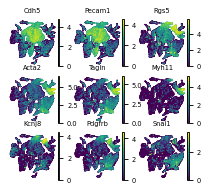

In [448]:
sc.settings.set_figure_params(dpi_save= 600, fontsize=6, figsize=(0.8,0.8), facecolor='white', frameon=True, transparent=True, format="pdf")
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color=["Cdh5", "Pecam1", "Rgs5", "Acta2", "Tagln", "Myh11", "Kcnj8" , "Pdgfrb", "Snai1"], ncols=3, color_map='viridis', add_outline=False, frameon=False, hspace=0.2, wspace=0.2, save="featureplots_cellgroupings")

In [33]:
sc.settings.set_figure_params(dpi_save= 600, fontsize=6, figsize=(3,3), facecolor='white', frameon=True, transparent=True, format="pdf")
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color=["Casp3", "Casp4", "Casp7", "Casp8", "Casp9", "Il6st",], ncols=3, color_map='viridis', add_outline=False, frameon=False, hspace=0.2, wspace=0.2)

KeyError: "Could not find entry in `obsm` for 'umap'.\nAvailable keys are: []."

In [7]:
import gseapy


Creating directory /home/mm2937/.config/bioservices 


Total data points: 11963


<ipython-input-511-1107dc15a4d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/series.py:990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-511-1107dc15a4d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-511-1107dc15a4d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

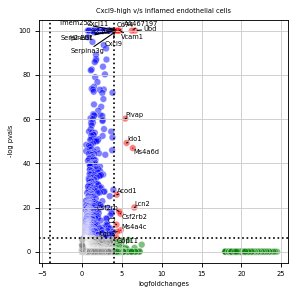

In [516]:
draw_volcano_plot(temp, lfc_thr = 4, pv_thr=0.000001, title = "Cxcl9-high v/s inflamed endothelial cells", figsize=(4, 4), only_pos=True)

In [ ]:
vol_plot = draw_volcano_plot(temp, pv_thr=pow(10, -10), title = "Cxcl9-high v/s inflamed endothelial cells", only_pos=True, return_plt=True)

In [ ]:
vol_plot.tight_layout()
# plt.show()
vol_plot.savefig("figures/endo_volcano.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [511]:
def draw_volcano_plot(pdata, lfc = "logfoldchanges", pv = "pvals_adj", names = "names", lfc_thr = 2.0, pv_thr = 0.01, adjust = True, title = None, figsize=(8, 6), only_pos = False, return_plt = False):
    df = pdata 
    if only_pos == True: 
        df = df[df[lfc] > 0]
    df.index = range(0, df.shape[0])
    print("Total data points: " + str(df.shape[0]))
    df[pv][df[pv] < pow(10, -100)] = pow(10, -100)
    df["-log pvals"] = -1 * np.log10(df[pv])
    df["volcano"] = ["++" if ((df[lfc][i] >= lfc_thr) & (df[pv][i] < pv_thr)) 
                 else "-+" if ((df[lfc][i] <= -1*lfc_thr) & (df[pv][i] < pv_thr)) 
                 else ".+" if ((df[lfc][i] <= lfc_thr or df[lfc][i] >= -1*lfc_thr) & (df[pv][i] < pv_thr))
                 else "+." if ((df[lfc][i] >= lfc_thr or df[lfc][i] <= -1*lfc_thr) & (df[pv][i] > pv_thr))
                 else ".." for i in range(df.shape[0])]
    df["volcano"] = df["volcano"].astype("category")
    fig, ax = plt.subplots(figsize=figsize)
    color_code = {"++": "red", "+.": "green", "-+": "red", ".+": "blue", "..": "grey"}
    colors = {x:color_code[x] for x in df["volcano"].cat.categories}
    sns.scatterplot(data = df, y= "-log pvals", x = lfc, ax = ax, hue = "volcano", palette=colors, alpha = 0.5)
#     ax.legend(loc = "best", bbox_to_anchor=(1.2, 0.8))
    plt.axhline(y= -1*np.log10(pv_thr), color="black", linestyle=":")
    plt.axvline(x=-1*lfc_thr, color="black", linestyle=":")
    plt.axvline(x=lfc_thr, color="black", linestyle=":")
    ax.get_legend().remove()
    texts = []
    for i in range(df.shape[0]):
        if(df["volcano"][i] == '++' or df["volcano"][i] == '-+'):
            texts.append(plt.text(x=df[lfc][i], y=df["-log pvals"][i], s=df[names][i], color='black'))
    from adjustText import adjust_text
    if adjust:
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=1.0))
    plt.title(title)
    if return_plt == True:
        return plt
    else:
        plt.show()

In [891]:
myocyte_markers = sc.get.rank_genes_groups_df(heart_infection_sc_4samples_no_viral_genes, key="rank_genes_groups_leiden_0.5", group= ["14"])
myocyte_markers.to_csv("./../csvs/myocyte_markers.csv")
myocyte_markers
# pd.DataFrame(heart_infection_sc_4samples_no_viral_genes.uns['rank_genes_groups_leiden_0.5']['names']).head(40)

names     scores  logfoldchanges          pvals      pvals_adj
0        Tnni3  40.536987        8.301436   0.000000e+00   0.000000e+00
1        Tnnt2  40.417866        8.097258   0.000000e+00   0.000000e+00
2         Tpm1  40.266293        6.630083   0.000000e+00   0.000000e+00
3        Actc1  39.918194        8.117577   0.000000e+00   0.000000e+00
4      Slc25a4  39.466690        4.544735   0.000000e+00   0.000000e+00
...        ...        ...             ...            ...            ...
22752    Actg1 -31.445225       -3.933688  4.878592e-217  3.700738e-214
22753    Itm2b -32.075661       -3.630901  9.634453e-226  8.120417e-223
22754      Vim -33.559296       -4.814250  6.589031e-247  8.330365e-244
22755   Tmsb4x -34.040760       -3.484750  5.561067e-254  9.039514e-251
22756     Actb -35.698772       -5.113864  4.130159e-279  7.230002e-276

[22757 rows x 5 columns]

In [898]:
heart_infection_sc_4samples_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes.h5ad")

In [18]:
Mock_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D4PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D4PI/outs/raw_feature_bc_matrix.h5')
Mock_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D7PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D7PI/outs/raw_feature_bc_matrix.h5')
Mock_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D10PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D10PI/outs/raw_feature_bc_matrix.h5')
# T1L_K287T_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D4PI/outs/filtered_feature_bc_matrix.h5')
# T1L_K287T_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D7PI/outs/filtered_feature_bc_matrix.h5')
# T1L_K287T_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D10PI/outs/filtered_feature_bc_matrix.h5')

Mock_Heart_D4PI_sc.var_names_make_unique()
T1L_WT_Heart_D4PI_sc.var_names_make_unique()
Mock_Heart_D7PI_sc.var_names_make_unique()
T1L_WT_Heart_D7PI_sc.var_names_make_unique()
Mock_Heart_D10PI_sc.var_names_make_unique()
T1L_WT_Heart_D10PI_sc.var_names_make_unique()
# T1L_K287T_Heart_D4PI_sc.var_names_make_unique()
# T1L_K287T_Heart_D7PI_sc.var_names_make_unique()
# T1L_K287T_Heart_D10PI_sc.var_names_make_unique()

reading ./../scData/Heart_Mock_D4PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D4PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_Mock_D7PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D7PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_Mock_D10PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D10PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [19]:
# samples = ["Heart_Mock_D4PI", "Heart_T1L-WT_D4PI", "Heart_Mock_D7PI", "Heart_T1L-WT_D7PI", "Heart_Mock_D10PI", "Heart_T1L-WT_D10PI"]

In [20]:
# heart_infection_sc = Mock_Heart_D4PI_sc.concatenate(T1L_Heart_D4PI_sc, KO287_Heart_D4PI_sc, 
#                                                     Mock_Heart_D7PI_sc, T1L_Heart_D7PI_sc,
#                                                     KO287_Heart_D7PI_sc, 
#                                                     batch_key= "sample", batch_categories=samples,
#                                                     index_unique="-")
# heart_infection_sc_4samples = Mock_Heart_D4PI_sc.concatenate(T1L_WT_Heart_D4PI_sc, Mock_Heart_D7PI_sc, T1L_WT_Heart_D7PI_sc,
#                                                              Mock_Heart_D10PI_sc, T1L_WT_Heart_D10PI_sc,
#                                                     batch_key= "sample", batch_categories=samples,
#                                                     index_unique="-")
heart_infection_sc_4samples = T1L_WT_Heart_D4PI_sc.concatenate(T1L_WT_Heart_D7PI_sc, T1L_WT_Heart_D10PI_sc,
                                                    batch_key= "sample", batch_categories=["Heart_T1L-WT_D4PI", "Heart_T1L-WT_D7PI", "Heart_T1L-WT_D10PI"],
                                                    index_unique="-")
heart_infection_sc_4samples.obs_names_make_unique()
heart_infection_sc_4samples.var_names_make_unique()
print(heart_infection_sc_4samples.shape)

(3193775, 54848)


In [21]:
reoviral_genes = [name for name in heart_infection_sc_4samples.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc_4samples[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(heart_infection_sc_4samples.var_names, reoviral_genes)
heart_infection_sc_4samples_no_viral_genes = heart_infection_sc_4samples[:, ~reoviral_genes_indicator]
heart_infection_sc_4samples_no_viral_genes.var_names = [name.split("_")[1] for name in heart_infection_sc_4samples_no_viral_genes.var_names]
heart_infection_sc_4samples_no_viral_genes.obs = heart_infection_sc_4samples_no_viral_genes.obs.join(viral_expression.astype(int))
print(heart_infection_sc_4samples_no_viral_genes.shape)

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(3193775, 54838)


In [22]:
temp_dataset_no_viral_genes  = heart_infection_sc_4samples_no_viral_genes
temp_dataset_no_viral_genes.var['mt'] = temp_dataset_no_viral_genes.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(temp_dataset_no_viral_genes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [23]:
data = pd.DataFrame({"cell_barcode":temp_dataset_no_viral_genes.obs_names, "total_counts":temp_dataset_no_viral_genes.obs["total_counts"], "sample":temp_dataset_no_viral_genes.obs["sample"]})
data["Gapdh"] = temp_dataset_no_viral_genes[:,"Gapdh"].to_df()
data["Hba-a1"] = temp_dataset_no_viral_genes[:,"Hba-a1"].to_df()
data["cell_in_droplet"] = ["Viable cells" if data.loc[x, "total_counts"] > 200 else "Dead cells" for x in data["cell_barcode"]]
data["cell_in_droplet"] = ["Background" if data.loc[x, "total_counts"] < 3 else data.loc[x, "cell_in_droplet"] for x in data["cell_barcode"]]
data["total_counts"] = data["total_counts"] + 1
data["Gapdh"] = data["Gapdh"] + 1
data["Hba-a1"] = data["Hba-a1"] + 1
print(data.shape)
print(data["cell_in_droplet"].value_counts())

(3193775, 6)
Background      2889198
Dead cells       278902
Viable cells      25675
Name: cell_in_droplet, dtype: int64


In [24]:
data = data.sort_values(by="total_counts", ascending=False)
data["cell_number"] = [i for i in range(temp_dataset_no_viral_genes.shape[0])]
data["cell_number"] = np.log10(data["cell_number"] + 1) + 1

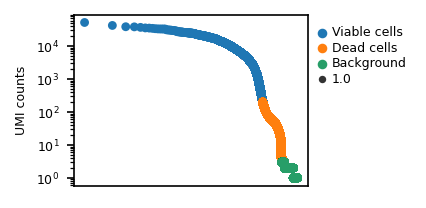

In [1038]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(False)
plt.xlabel("Droplets")
plt.ylabel("UMI counts")
sns.scatterplot(data = data, x = "cell_number", y = "total_counts", hue = "cell_in_droplet", linewidth = 0, size = 1.0, rasterized=True, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(yscale = "log", xscale = "log")
ax.axes.xaxis.set_visible(False)
# ax.axes.xaxis.set_ticks([])
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("./figures/knee_totalUMI.pdf")

In [25]:
# Mock_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D4PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D4PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/raw_feature_bc_matrix.h5')
# Mock_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D7PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/raw_feature_bc_matrix.h5')
# Mock_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D10PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D10PI_xGen//outs/raw_feature_bc_matrix.h5')
# T1L_K287T_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D4PI/outs/filtered_feature_bc_matrix.h5')
# T1L_K287T_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D7PI/outs/filtered_feature_bc_matrix.h5')
# T1L_K287T_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D10PI/outs/filtered_feature_bc_matrix.h5')

# Mock_Heart_D4PI_sc.var_names_make_unique()
T1L_WT_Heart_D4PI_xGen3.var_names_make_unique()
# Mock_Heart_D7PI_sc.var_names_make_unique()
T1L_WT_Heart_D7PI_xGen3.var_names_make_unique()
# Mock_Heart_D10PI_sc.var_names_make_unique()
T1L_WT_Heart_D10PI_xGen3.var_names_make_unique()
# T1L_K287T_Heart_D4PI_sc.var_names_make_unique()
# T1L_K287T_Heart_D7PI_sc.var_names_make_unique()
# T1L_K287T_Heart_D10PI_sc.var_names_make_unique()

heart_infection_sc_4samples_xGen3 = T1L_WT_Heart_D4PI_xGen3.concatenate(T1L_WT_Heart_D7PI_xGen3, T1L_WT_Heart_D10PI_xGen3,
                                                    batch_key= "sample", batch_categories=["Heart_T1L-WT_D4PI", "Heart_T1L-WT_D7PI", "Heart_T1L-WT_D10PI"],
                                                    index_unique="-")
heart_infection_sc_4samples_xGen3.obs_names_make_unique()
heart_infection_sc_4samples_xGen3.var_names_make_unique()
print(heart_infection_sc_4samples_xGen3.shape)

reading ./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_T1L_D10PI_xGen//outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(84949, 54848)


In [26]:
reoviral_genes = [name for name in heart_infection_sc_4samples_xGen3.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc_4samples_xGen3[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(heart_infection_sc_4samples_xGen3.var_names, reoviral_genes)
heart_infection_sc_4samples_xGen3 = heart_infection_sc_4samples_xGen3[:, reoviral_genes_indicator]
heart_infection_sc_4samples_xGen3.var_names = [name.split("_")[1] for name in heart_infection_sc_4samples_xGen3.var_names]
heart_infection_sc_4samples_xGen3.obs = heart_infection_sc_4samples_xGen3.obs.join(viral_expression.astype(int))
print(heart_infection_sc_4samples_xGen3.shape)

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(84949, 10)


In [27]:
temp_dataset_viral_genes  = heart_infection_sc_4samples_xGen3
temp_dataset_viral_genes.var['mt'] = temp_dataset_viral_genes.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(temp_dataset_viral_genes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [28]:
viral_data = pd.DataFrame({"cell_barcode":temp_dataset_viral_genes.obs_names, "sample":temp_dataset_viral_genes.obs["sample"], "total_viral_counts":temp_dataset_viral_genes.obs["total_counts"]})
viral_data = viral_data.sort_values(by="total_viral_counts", ascending=False)
viral_data["cell_number"] = [i+1 for i in range(viral_data.shape[0])]
viral_data["cell_number"] = np.log10(viral_data["cell_number"]+1) + 1

# viral_data = viral_data[viral_data["cell_barcode"].isin(data["cell_barcode"])]
print(viral_data.shape)

# viral_data["cell_in_droplet"] = [data.loc[x,"cell_in_droplet"] for x in viral_data.index]
# viral_data["total_counts"] = [data.loc[x,"total_counts"] for x in viral_data.index]
# viral_data["Gapdh"] = [data.loc[x,"Gapdh"] for x in viral_data.index]

# print(viral_data["cell_in_droplet"].value_counts())

data["total_viral_counts"] = [viral_data.loc[x, "total_viral_counts"] if x in viral_data.index else 0 for x in data.index]
data["total_viral_counts"] = data["total_viral_counts"] + 1

(84949, 4)


In [29]:
data = data.sort_values(by="total_viral_counts", ascending=False)
data["cell_number"] = [i for i in range(temp_dataset_no_viral_genes.shape[0])]
data["cell_number"] = np.log10(data["cell_number"] + 1) + 1

# sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, facecolor='white', frameon=True, figsize=(10, 10), transparent=True, format="pdf")
# g = sns.FacetGrid(data, col="cell_in_droplet", hue="cell_in_droplet")
# g.map(sns.scatterplot, "cell_number", "total_viral_counts", linewidth = 0, size = 1.0).set(yscale = "log", xscale = "log")
# g.add_legend()

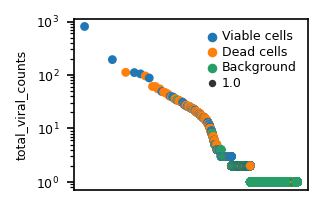

In [1044]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.rc('font', size=6)
plt.grid(False)
plt.xlabel("Viral UMI counts")
plt.xlabel("Droplets")
sns.scatterplot(data = data, x = "cell_number", y = "total_viral_counts", hue = "cell_in_droplet", linewidth = 0, size = 1.0, rasterized=True, ax=ax)
ax.set(yscale = "log", xscale = "log")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
ax.axes.xaxis.set_visible(False)
ax.axhline(1.25)
# plt.tight_layout()
plt.savefig("./figures/knee_totalviralUMI.pdf")

In [984]:
print(np.sum(data[data["cell_in_droplet"] == "Empty"]["total_viral_counts"] == 1))
print(np.sum(data[data["cell_in_droplet"] == "Low"]["total_viral_counts"] == 1))
print(np.sum(data[data["cell_in_droplet"] == "High"]["total_viral_counts"] == 1))
print(np.mean(data[data["cell_in_droplet"] == "Empty"]["total_viral_counts"] - 1))
print(np.mean(data[data["cell_in_droplet"] == "Low"]["total_viral_counts"] - 1))
print(np.mean(data[data["cell_in_droplet"] == "High"]["total_viral_counts"] - 1))

1515997
1648097
23285
0.001277691273151153
0.003450429834494483
0.20222005842259005


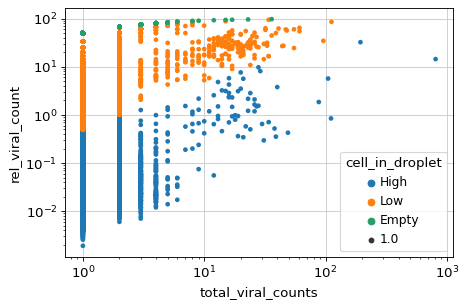

In [951]:
viral_data["rel_viral_count"] = (viral_data["total_viral_counts"]/(viral_data["total_viral_counts"]+viral_data["total_counts"]))*100
# viral_data["rel_viral_count"] = (viral_data["Gapdh"]/(viral_data["Gapdh"]+viral_data["total_counts"]))*100

viral_data = viral_data.sort_values(by="total_counts", ascending=False)
viral_data["cell_number"] = [i+1 for i in range(viral_data.shape[0])]
# viral_data["cell_number"] = np.log10(viral_data["cell_number"]+1) + 1

sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, facecolor='white', frameon=True, figsize=(3, 3), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data = viral_data, x="total_viral_counts", y="rel_viral_count", hue="cell_in_droplet",linewidth = 0, size = 1.0, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(xscale= "log", yscale = "log")
plt.tight_layout()
plt.show()

In [715]:
bins = [x*200 for x in range(0,200)]
labels = [i for i in range(len(bins) - 1)]
viral_data['binned'] = pd.cut(viral_data["total_counts"], bins=bins, labels=labels)
print(viral_data.head())

                          cell_barcode  total_viral_counts  cell_number  \
ACGTACAAGGACTGGT-1  ACGTACAAGGACTGGT-1                 3.0            1   
ATATCCTCACTGTGAT-1  ATATCCTCACTGTGAT-1                 6.0            2   
CTCCAACAGTAGTCCT-1  CTCCAACAGTAGTCCT-1                 3.0            3   
TTTACCATCAGAACCT-1  TTTACCATCAGAACCT-1                 4.0            4   
GGATCTATCTAGACCA-1  GGATCTATCTAGACCA-1                 2.0            5   

                   cell_in_droplet  total_counts  Gapdh  rel_viral_count  \
ACGTACAAGGACTGGT-1            High       38580.0   17.0         0.000441   
ATATCCTCACTGTGAT-1            High       34741.0    9.0         0.000259   
CTCCAACAGTAGTCCT-1            High       33465.0    9.0         0.000269   
TTTACCATCAGAACCT-1            High       33323.0   22.0         0.000660   
GGATCTATCTAGACCA-1            High       33258.0   17.0         0.000511   

                   binned  
ACGTACAAGGACTGGT-1    192  
ATATCCTCACTGTGAT-1    173  
CTCCAACA

In [716]:
binned_data = pd.DataFrame({"bins":bins, "number_cells":pd.NA, "num_grt_one": pd.NA, "pct_grt_one":pd.NA})
# print(binned_data)
for i in labels:
    binned_data.loc[i, "number_cells"] = viral_data[viral_data["binned"] == i].shape[0]
    binned_data.loc[i, "pct_grt_one"] = (np.sum(viral_data[viral_data["binned"] == i]["total_viral_counts"] > 1)/binned_data.loc[i, "number_cells"])*100
    binned_data.loc[i, "pct_grt_two"] = (np.sum(viral_data[viral_data["binned"] == i]["total_viral_counts"] > 2)/binned_data.loc[i, "number_cells"])*100
    binned_data.loc[i, "pct_grt_five"] = (np.sum(viral_data[viral_data["binned"] == i]["total_viral_counts"] > 5)/binned_data.loc[i, "number_cells"])*100
    binned_data.loc[i, "pct_grt_ten"] = (np.sum(viral_data[viral_data["binned"] == i]["total_viral_counts"] > 10)/binned_data.loc[i, "number_cells"])*100
    binned_data.loc[i, "pct_grt_hundred"] = (np.sum(viral_data[viral_data["binned"] == i]["total_viral_counts"] > 100)/binned_data.loc[i, "number_cells"])*100
binned_data.head(40)

<ipython-input-716-ac3d8bd5c4a6>:5: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:6: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:7: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:8: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:9: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:5: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:6: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:7: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:8: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:9: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:5: RuntimeWarning: invalid 

<ipython-input-716-ac3d8bd5c4a6>:8: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:9: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:5: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:6: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:7: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:8: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:9: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:5: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:6: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:7: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:8: RuntimeWarning: invalid 

<ipython-input-716-ac3d8bd5c4a6>:8: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:9: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:5: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:6: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:7: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:8: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:9: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:5: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:6: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:7: RuntimeWarning: invalid value encountered in long_scalars
<ipython-input-716-ac3d8bd5c4a6>:8: RuntimeWarning: invalid 

bins number_cells num_grt_one pct_grt_one  pct_grt_two  pct_grt_five  \
0      0        16293        <NA>   11.323881     1.736942      0.632173   
1    200          602        <NA>    3.986711     0.996678      0.664452   
2    400          388        <NA>    6.443299     2.319588      1.546392   
3    600          323        <NA>    6.811146     1.857585      1.238390   
4    800          270        <NA>     9.62963     1.851852      1.111111   
5   1000          261        <NA>    7.662835     0.383142      0.383142   
6   1200          262        <NA>   10.687023     2.671756      1.908397   
7   1400          241        <NA>    11.20332     1.244813      0.414938   
8   1600          208        <NA>   10.576923     0.480769      0.000000   
9   1800          210        <NA>   13.809524     2.380952      1.428571   
10  2000          197        <NA>   16.751269     1.522843      0.507614   
11  2200          199        <NA>   16.080402     3.015075      1.005025   
12  2400          157        <NA>   14.012739     2.547771      0.636943   
13  2600          153        <NA>    13.72549     2.614379      0.000000   
14  2800          165        <NA>   16.969697     1.212121      0.000000   
15  3000          184        <NA>   16.847826     1.086957      0.000000   
16  3200          153        <NA>    15.03268     0.653595      0.000000   
17  3400          131        <NA>   12.977099     0.763359      0.000000   
18  3600          142        <NA>   14.788732     2.816901      0.704225   
19  3800          115        <NA>        20.0     2.608696      0.869565   
20  4000          115        <NA>   23.478261     0.869565      0.000000   
21  4200          112        <NA>   29.464286     3.571429      0.000000   
22  4400          122        <NA>   24.590164     3.278689      0.000000   
23  4600          103        <NA>   24.271845     3.883495      2.912621   
24  4800          110        <NA>   30.909091     4.545455      0.000000   
25  5000          108        <NA>   28.703704     8.333333      0.000000   
26  5200          103        <NA>   27.184466     4.854369      0.970874   
27  5400           83        <NA>   28.915663     4.819277      0.000000   
28  5600           82        <NA>   29.268293     6.097561      0.000000   
29  5800           72        <NA>   26.388889     6.944444      0.000000   
30  6000           48        <NA>   35.416667    10.416667      2.083333   
31  6200           68        <NA>        25.0     1.470588      0.000000   
32  6400           74        <NA>   32.432432     5.405405      0.000000   
33  6600           64        <NA>     32.8125     9.375000      0.000000   
34  6800           52        <NA>   28.846154     0.000000      0.000000   
35  7000           33        <NA>   21.212121     6.060606      0.000000   
36  7200           36        <NA>   44.444444    13.888889      2.777778   
37  7400           43        <NA>   44.186047     2.325581      0.000000   
38  7600           34        <NA>   29.411765    20.588235      0.000000   
39  7800           27        <NA>   48.148148     7.407407      0.000000   

    pct_grt_ten  pct_grt_hundred  
0      0.454183         0.000000  
1      0.664452         0.000000  
2      1.030928         0.257732  
3      0.309598         0.000000  
4      1.111111         0.000000  
5      0.383142         0.000000  
6      0.381679         0.000000  
7      0.414938         0.000000  
8      0.000000         0.000000  
9      1.428571         0.000000  
10     0.507614         0.000000  
11     1.005025         0.000000  
12     0.000000         0.000000  
13     0.000000         0.000000  
14     0.000000         0.000000  
15     0.000000         0.000000  
16     0.000000         0.000000  
17     0.000000         0.000000  
18     0.704225         0.000000  
19     0.000000         0.000000  
20     0.000000         0.000000  
21     0.000000         0.000000  
22     0.000000         0.000000  
23     2.912621         0.000000  
24     0.000

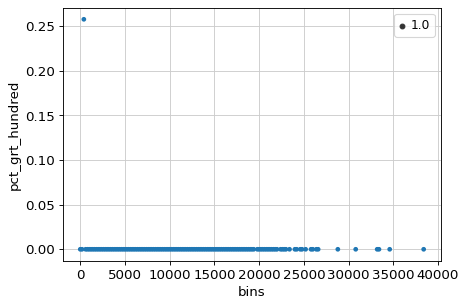

In [722]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, facecolor='white', frameon=True, figsize=(3, 3), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data = binned_data, x="bins", y="pct_grt_hundred", linewidth = 0, size = 1.0, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# ax.set(yscale = "log", xscale = "log")
# ax.invert_yaxis()
plt.tight_layout()
plt.show()

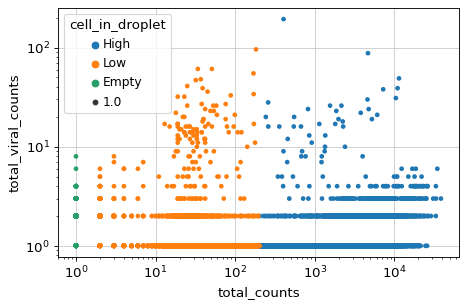

In [723]:
viral_data = viral_data.sort_values(by="total_counts", ascending=False)

sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, facecolor='white', frameon=True, figsize=(3, 3), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data = viral_data, x="total_counts", y="total_viral_counts", hue="cell_in_droplet",linewidth = 0, size = 1.0, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(yscale = "log", xscale = "log")
plt.tight_layout()
plt.show()

In [952]:
sc.settings.set_figure_params(dpi_save= 600, fontsize=6, figsize=(3.0,3.0), facecolor='white', frameon=True, transparent=True, format="pdf")
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color=["Jama", "Jaml"], ncols=4, color_map='viridis')

... storing 'feature_types' as categorical
... storing 'genome' as categorical


KeyError: "Could not find entry in `obsm` for 'umap'.\nAvailable keys are: []."